In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## DATA CLEANING AND EXPLORATION

In [183]:
#read data
df = pd.read_excel("C:/Users/fauziah/Desktop/other/data/2013-2023_ Monthly  Steel Production Data.xlsx", 'Monthly Steel Outlook', header = 1)

#Unpivot the table
df_unpivot2 = pd.melt(df, id_vars='Year ', value_vars=[ 'crude steel: January',
       'crude steel: February', 'crude steel: March', 'crude steel: April',
       'crude steel: May', 'crude steel: June', 'crude steel: July',
       'crude steel: August', 'crude steel: September', 'crude steel: October',
       'crude steel: November', 'crude steel: December'])
df_unpivot2.rename(columns = {'Year ':'Year'}, inplace = True)
df_unpivot2.Year = df_unpivot2.Year.astype(str)

#Remove character in the value and column that we dont need 
df_unpivot2['date'] =  df_unpivot2.Year.str[0:]+ " " + df_unpivot2.variable.str[13:]
df_unpivot2.columns = ['Year','t', 'value', 'date']
df_unpivot2 = df_unpivot2[['value', 'date']]

#Group by the date
df = df_unpivot2.groupby('date').sum().reset_index()

#Change date data type
df['date']=pd.to_datetime(df['date'])

#sort the date in ascending
df.sort_values(by='date', ascending = True, inplace = True)

#Set the index for date
df.set_index('date',inplace=True)

C:\Users\fauziah\AppData\Local\Temp\ipykernel_2364\1908782974.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date']=pd.to_datetime(df['date'])


In [184]:
df_unpivot2

value           date
0      291.666667   2023 January
1       22.500000   2023 January
2      811.700000   2023 January
3        1.250000   2023 January
4       33.333333   2023 January
...           ...            ...
12415    5.229176  2014 December
12416   94.857000  2014 December
12417   36.627000  2014 December
12418   11.000000  2014 December
12419  148.410000  2014 December

[12420 rows x 2 columns]

<Axes: xlabel='date'>

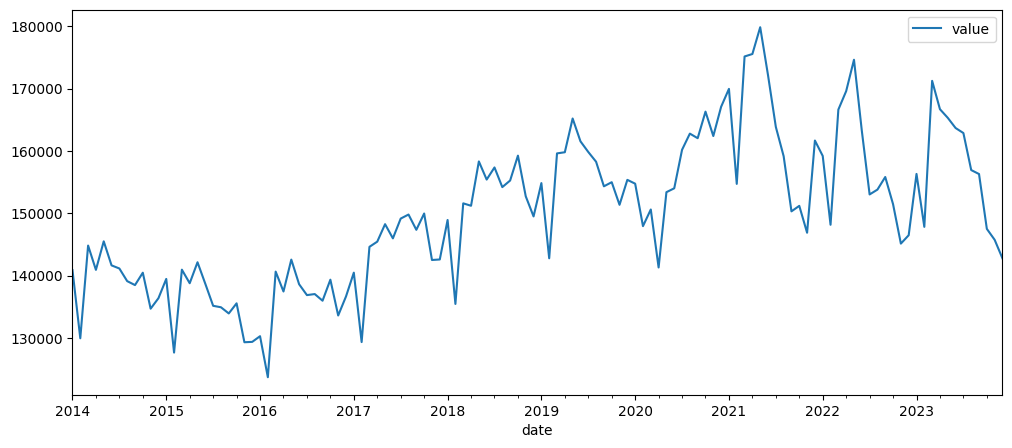

In [185]:
#Plot the actual data (group by date)

df.plot(figsize=(12,5))

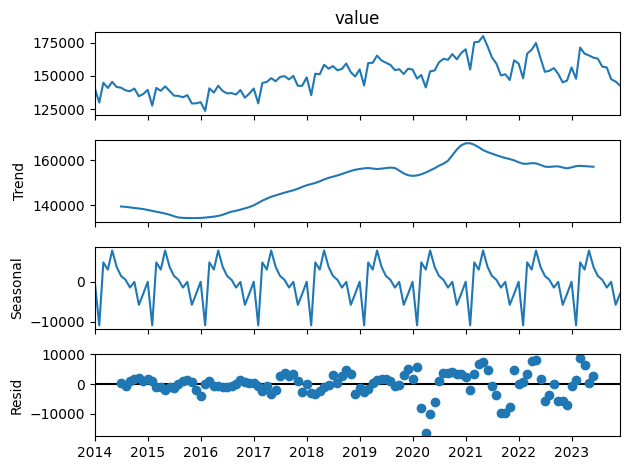

In [186]:
#Decompose Method

from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['value'],model='additive', period=12)
decompose.plot()
plt.show()

## MODEL 1

In [187]:
#df['Seasonal First Difference']=df['value']-df['value'].shift(12)
df['Seasonal First Difference'] = df['value'].diff().dropna()

<Axes: xlabel='date'>

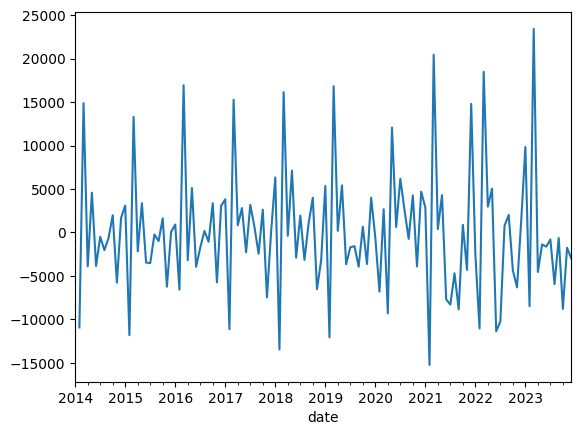

In [188]:
df['Seasonal First Difference'].plot()

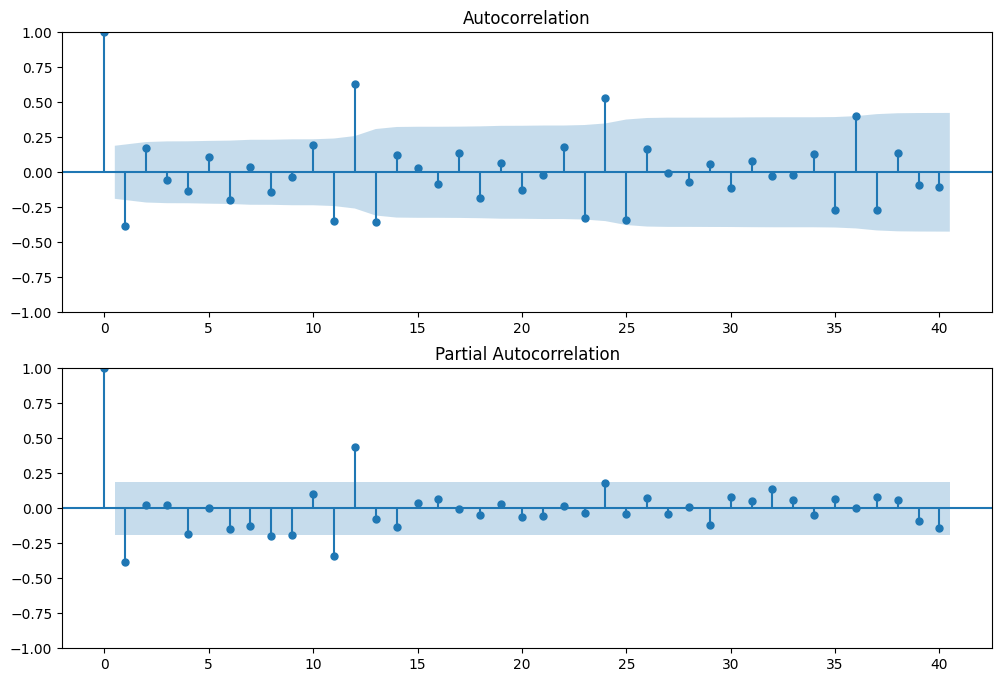

In [189]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [216]:
#run model, use value because already set in the order = p,d,q = 1,2,1
model=sm.tsa.statespace.SARIMAX(df['value'],order=(0, 0, 0),seasonal_order=(1,1,1,12))
results=model.fit()
results.summary()

C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                      value   No. Observations:                  120
Model:             SARIMAX(1, 1, [1], 12)   Log Likelihood               -1133.673
Date:                    Mon, 15 Jan 2024   AIC                           2273.346
Time:                            13:39:46   BIC                           2281.393
Sample:                        01-01-2014   HQIC                          2276.609
                             - 12-01-2023                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0777      1.250     -0.062      0.950      -2.528       2.373
ma.S.L12       0.0419      1.264      0.033      0.974      -2.436       2.520
sigma2      9.115e+07   2.67e-09   3.42e+16      0.000    9.12e+07    9.12e+07
===================================================================================
Ljung-Box (L1) (Q):                  71.08   Jarque-Bera (JB):                13.12
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.79   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  1e+34. Standard errors may be unstable.
"""

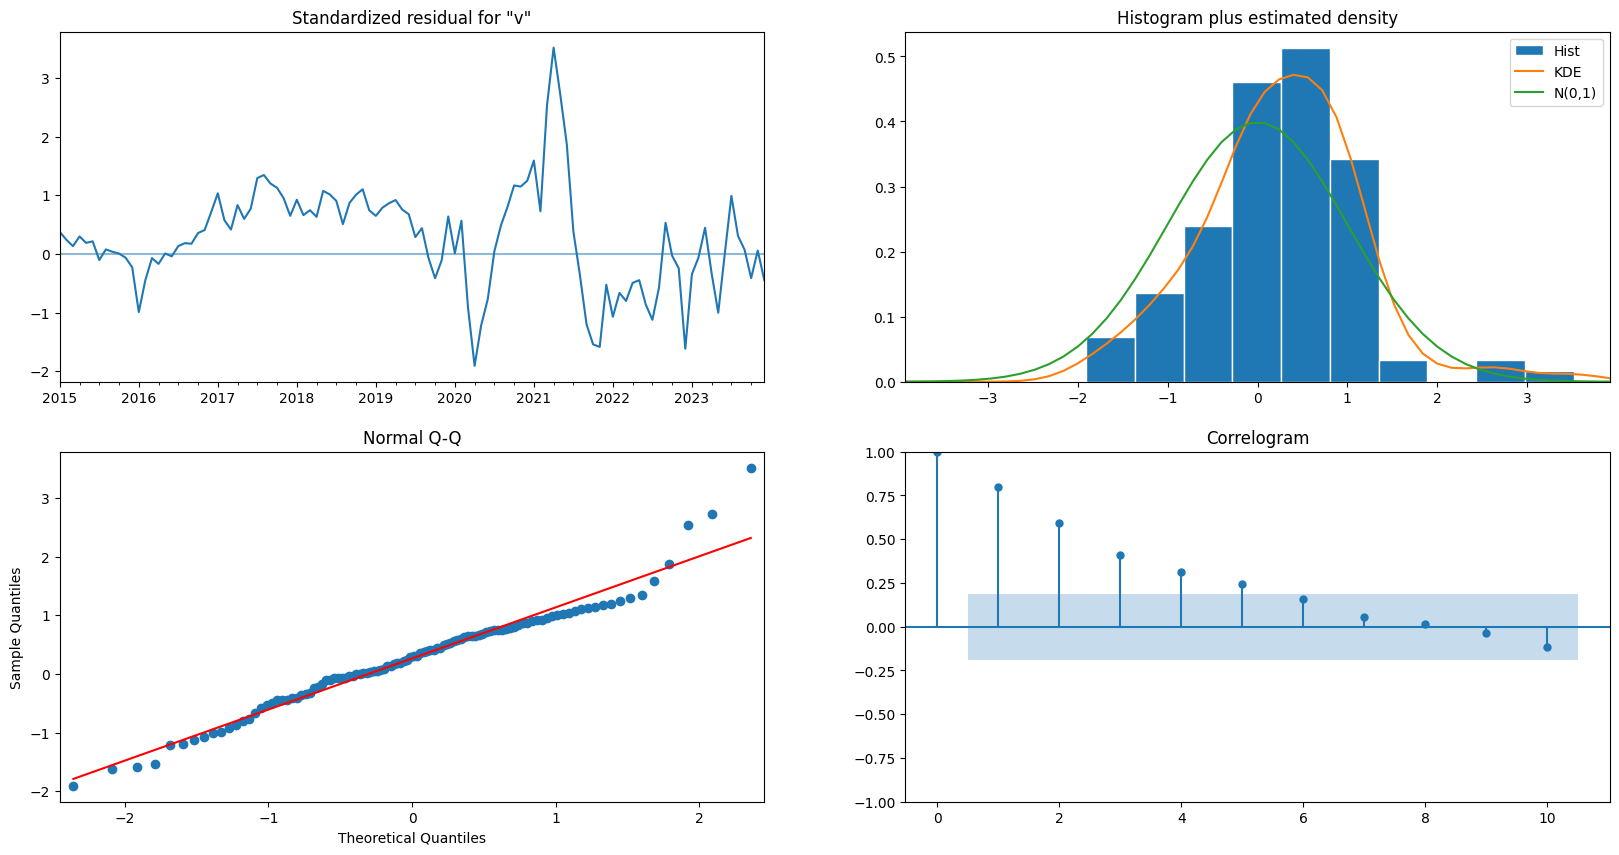

In [217]:
results.plot_diagnostics(figsize=(20, 10))
plt.show()

<Axes: xlabel='date'>

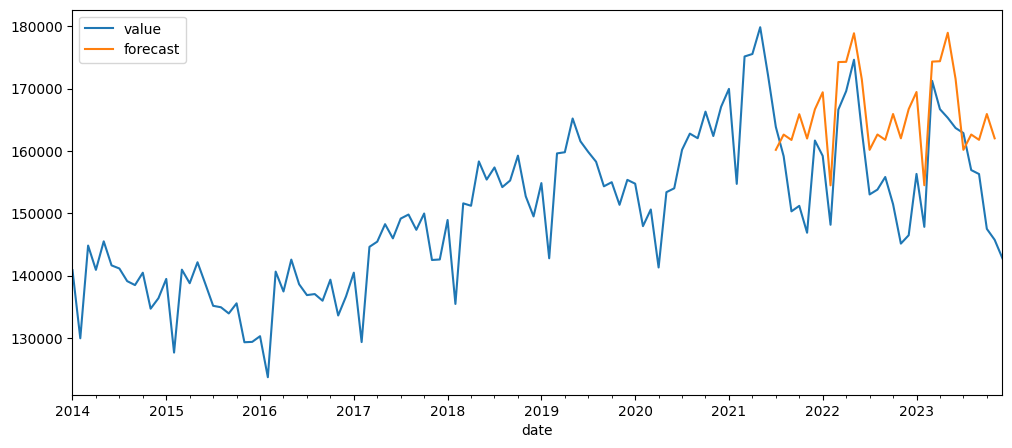

In [218]:
df['forecast']=results.predict(start=90,end=118,dynamic=True)
df[['value','forecast']].plot(figsize=(12,5))

## Model 2

-using hypermeter

In [11]:
model2=sm.tsa.statespace.SARIMAX(df['value'],order=(5, 2, 1),seasonal_order=(1,1,1,12))
results2=model2.fit()
results2.summary()

C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  120
Model:             SARIMAX(5, 2, 1)x(1, 1, 1, 12)   Log Likelihood               -1064.115
Date:                            Wed, 06 Dec 2023   AIC                           2146.231
Time:                                    09:36:15   BIC                           2170.202
Sample:                                01-01-2014   HQIC                          2155.946
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3084      0.118      2.616      0.009       0.077       0.539
ar.L2          0.0006      0.055      0.012      0.991      -0.108       0.109
ar.L3         -0.0135      0.074     -0.182      0.855      -0.158       0.131
ar.L4          0.0217      0.063      0.345      0.730      -0.101       0.145
ar.L5          0.0253      0.057      0.446      0.656      -0.086       0.137
ma.L1         -0.9873      0.106     -9.278      0.000      -1.196      -0.779
ar.S.L12       0.6474      0.146      4.419      0.000       0.360       0.935
ma.S.L12      -0.9286      0.207     -4.478      0.000      -1.335      -0.522
sigma2       3.41e+07   3.55e-09    9.6e+15      0.000    3.41e+07    3.41e+07
===================================================================================
Ljung-Box (L1) (Q):                   4.02   Jarque-Bera (JB):                 2.92
Prob(Q):                              0.04   Prob(JB):                         0.23
Heteroskedasticity (H):               3.43   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.8e+30. Standard errors may be unstable.
"""

In [19]:
results2.aic

2146.230810851741

In [219]:
df['forecast']=results2.predict(start=90,end=118,dynamic=True)

NameError: name 'results2' is not defined

<Axes: xlabel='date'>

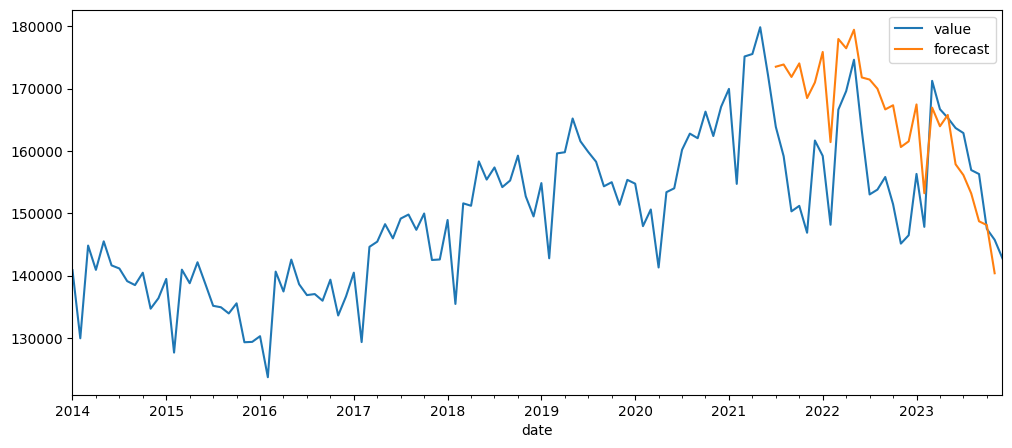

In [13]:
df[['value','forecast']].plot(figsize=(12,5))

In [62]:
df2 = df.dropna(subset=['value', 'forecast'])

<Axes: xlabel='date'>

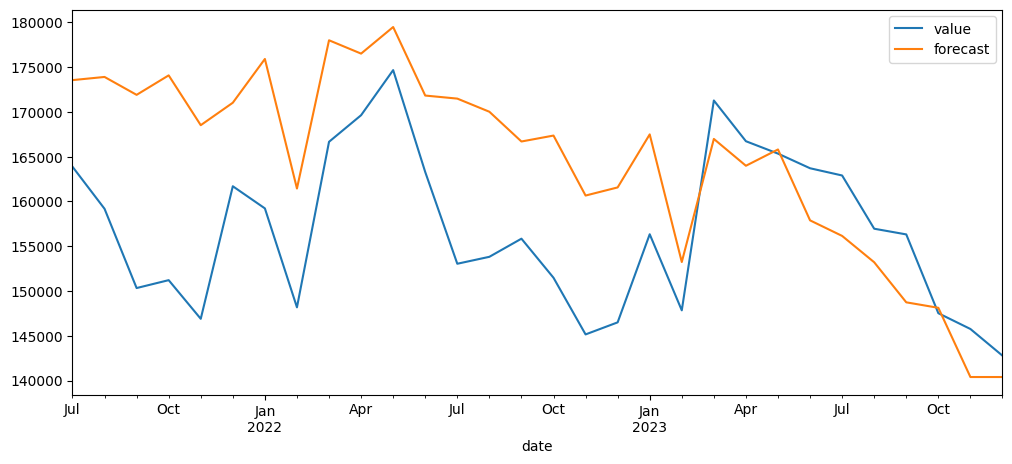

In [66]:
df2[['value','forecast']].plot(figsize=(12,5))

## RMSE

In [68]:
#MODEL 1

#run model, use value because already set in the order = p,d,q = 1,2,1
model=sm.tsa.statespace.SARIMAX(df['value'],order=(1, 2, 1),seasonal_order=(1,1,1,12))
results=model.fit()

df['forecast']=results.predict(start=90,end=118,dynamic=True)

#drop na
drop_na = df.dropna(subset=['value', 'forecast'])

# Evaluate the model
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(drop_na['value'], drop_na['forecast']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Root Mean Squared Error (RMSE): 11846.644524160836


C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [69]:
#Model 2
#run model, use value because already set in the order = p,d,q = 1,2,1
model=sm.tsa.statespace.SARIMAX(df['value'],order=(2, 2, 1),seasonal_order=(1,1,1,12))
results=model.fit()

df['forecast']=results.predict(start=90,end=118,dynamic=True)

#drop na
drop_na = df.dropna(subset=['value', 'forecast'])

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(drop_na['value'], drop_na['forecast']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting M

Root Mean Squared Error (RMSE): 14105.829587609822


In [14]:
#Model 3
#run model, use value because already set in the order = p,d,q = 1,2,1
model=sm.tsa.statespace.SARIMAX(df['value'],order=(5, 2, 1),seasonal_order=(1,1,1,12))
results=model.fit()

df['forecast']=results.predict(start=90,end=118,dynamic=True)

#drop na
drop_na = df.dropna(subset=['value', 'forecast'])

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(drop_na['value'], drop_na['forecast']))
print(f'Root Mean Squared Error (RMSE): {rmse}')

C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Root Mean Squared Error (RMSE): 12282.982207824927


## EVALUATE ALL METRICS IN ONE TABLE

In [39]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

#MODEL 1
model1=sm.tsa.statespace.SARIMAX(df['value'],order=(1, 2, 1),seasonal_order=(1,1,1,12))
results1=model1.fit()
#forecast value
df['forecast1']=results1.predict(start=90,end=118,dynamic=True)
#drop na
drop_na1 = df.dropna(subset=['value', 'forecast1'])
#metrics value
rmse1 = sqrt(mean_squared_error(drop_na1['value'], drop_na1['forecast1']))
mae1 = mean_absolute_error(drop_na1['value'], drop_na1['forecast1'])
mse1 = mean_squared_error(drop_na1['value'], drop_na1['forecast1'])

#MODEL 2
model2=sm.tsa.statespace.SARIMAX(df['value'],order=(2, 2, 1),seasonal_order=(1,1,1,12))
results2=model2.fit()
#forecast value
df['forecast2']=results2.predict(start=90,end=118,dynamic=True)
#drop na
drop_na2 = df.dropna(subset=['value', 'forecast2'])
#metrics value
rmse2 = sqrt(mean_squared_error(drop_na2['value'], drop_na2['forecast2']))
mae2 = mean_absolute_error(drop_na2['value'], drop_na2['forecast2'])
mse2 = mean_squared_error(drop_na2['value'], drop_na2['forecast2'])

#MODEL 3
model3=sm.tsa.statespace.SARIMAX(df['value'],order=(5, 2, 1),seasonal_order=(1,1,1,12))
results3=model3.fit()
#forecast value
df['forecast3']=results3.predict(start=90,end=118,dynamic=True)
#drop na
drop_na3 = df.dropna(subset=['value', 'forecast3'])
#metrics value
rmse3 = sqrt(mean_squared_error(drop_na3['value'], drop_na3['forecast1']))
mae3 = mean_absolute_error(drop_na3['value'], drop_na3['forecast1'])
mse3 = mean_squared_error(drop_na3['value'], drop_na3['forecast1'])
#AIC Value
AIC1 = results1.aic
AIC2 = results2.aic
AIC3 = results3.aic

C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Pr

In [28]:
print(rmse1)
print(mae1)
print(mse1)
print(AIC1)

12282.982207824927
10586.981138986415
150871651.91774374
2146.230810851741


In [40]:
results_evaluation = pd.DataFrame({'Model': ['MODEL 1', 'MODEL 2', 'MODEL 3'],
                        'RMSE' : [rmse1, rmse2, rmse3 ],
                        'MSE': [mse1, mse2, mse3 ],
                        'mae1': [mae1, mae2, mae3],
                       'AIC': [AIC1, AIC2, AIC3]})


In [41]:
results_evaluation

Model          RMSE           MSE          mae1          AIC
0  MODEL 1  11846.644524  1.403430e+08  10788.506306  2138.360838
1  MODEL 2  14105.829588  1.989744e+08  12247.082715  2142.132625
2  MODEL 3  11846.644524  1.403430e+08  10788.506306  2146.230811

## Predict the future

In [223]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [224]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [225]:
future_datest_df

value Seasonal First Difference forecast
2024-01-01   NaN                       NaN      NaN
2024-02-01   NaN                       NaN      NaN
2024-03-01   NaN                       NaN      NaN
2024-04-01   NaN                       NaN      NaN
2024-05-01   NaN                       NaN      NaN
2024-06-01   NaN                       NaN      NaN
2024-07-01   NaN                       NaN      NaN
2024-08-01   NaN                       NaN      NaN
2024-09-01   NaN                       NaN      NaN
2024-10-01   NaN                       NaN      NaN
2024-11-01   NaN                       NaN      NaN
2024-12-01   NaN                       NaN      NaN
2025-01-01   NaN                       NaN      NaN
2025-02-01   NaN                       NaN      NaN
2025-03-01   NaN                       NaN      NaN
2025-04-01   NaN                       NaN      NaN
2025-05-01   NaN                       NaN      NaN
2025-06-01   NaN                       NaN      NaN
2025-07-01   NaN                       NaN      NaN
2025-08-01   NaN                       NaN      NaN
2025-09-01   NaN                       NaN      NaN
2025-10-01   NaN                       NaN      NaN
2025-11-01   NaN                       NaN      NaN

In [226]:
future_df=pd.concat([df,future_datest_df])

In [227]:
future_df['forecast'] = results.predict(start = 120, end = 139, dynamic= True)  
future_df

value  Seasonal First Difference       forecast
2014-01-01  140887.513341                        NaN            NaN
2014-02-01  129953.978091              -10933.535251            NaN
2014-03-01  144832.952386               14878.974295            NaN
2014-04-01  140932.008760               -3900.943626            NaN
2014-05-01  145507.403678                4575.394918            NaN
...                   ...                        ...            ...
2025-07-01            NaN                        NaN  162542.796572
2025-08-01            NaN                        NaN  156831.480080
2025-09-01            NaN                        NaN            NaN
2025-10-01            NaN                        NaN            NaN
2025-11-01            NaN                        NaN            NaN

[143 rows x 3 columns]

In [228]:
future_df.tail(50)

value  Seasonal First Difference       forecast
2021-10-01  151200.759333                 881.463000            NaN
2021-11-01  146885.818333               -4314.941000            NaN
2021-12-01  161682.488333               14796.670000            NaN
2022-01-01  159211.710763               -2470.777570            NaN
2022-02-01  148165.773660              -11045.937103            NaN
2022-03-01  166643.561230               18477.787570            NaN
2022-04-01  169611.476670                2967.915440            NaN
2022-05-01  174645.675650                5034.198980            NaN
2022-06-01  163270.803970              -11374.871680            NaN
2022-07-01  153031.685660              -10239.118310            NaN
2022-08-01  153806.530060                 774.844400            NaN
2022-09-01  155830.218210                2023.688150            NaN
2022-10-01  151468.255280               -4361.962930            NaN
2022-11-01  145143.917510               -6324.337770            NaN
2022-12-01  146489.258650                1345.341140            NaN
2023-01-01  156323.921937                9834.663287            NaN
2023-02-01  147831.681567               -8492.240370            NaN
2023-03-01  171255.945967               23424.264400            NaN
2023-04-01  166708.177557               -4547.768410            NaN
2023-05-01  165325.379107               -1382.798450            NaN
2023-06-01  163690.494037               -1634.885070            NaN
2023-07-01  162883.568367                -806.925670            NaN
2023-08-01  156942.302967               -5941.265400            NaN
2023-09-01  156306.374317                -635.928649            NaN
2023-10-01  147510.483046               -8795.891272            NaN
2023-11-01  145750.414050               -1760.068995            NaN
2023-12-01  142771.381259               -2979.032791            NaN
2024-01-01            NaN                        NaN  156410.279377
2024-02-01            NaN                        NaN  147833.388015
2024-03-01            NaN                        NaN  171076.310759
2024-04-01            NaN                        NaN  166801.059949
2024-05-01            NaN                        NaN  165649.799913
2024-06-01            NaN                        NaN  163660.934597
2024-07-01            NaN                        NaN  162514.072823
2024-08-01            NaN                        NaN  156822.138788
2024-09-01            NaN                        NaN  156298.347249
2024-10-01            NaN                        NaN  147653.675875
2024-11-01            NaN                        NaN  145727.073139
2024-12-01            NaN                        NaN  142882.152910
2025-01-01            NaN                        NaN  156403.566145
2025-02-01            NaN                        NaN  147833.255360
2025-03-01            NaN                        NaN  171090.275195
2025-04-01            NaN                        NaN  166793.839481
2025-05-01            NaN                        NaN  165624.580172
2025-06-01            NaN                        NaN  163663.232481
2025-07-01            NaN                        NaN  162542.796572
2025-08-01            NaN                        NaN  156831.480080
2025-09-01            NaN                        NaN            NaN
2025-10-01            NaN                        NaN            NaN
2025-11-01            NaN                        NaN            NaN

<Axes: >

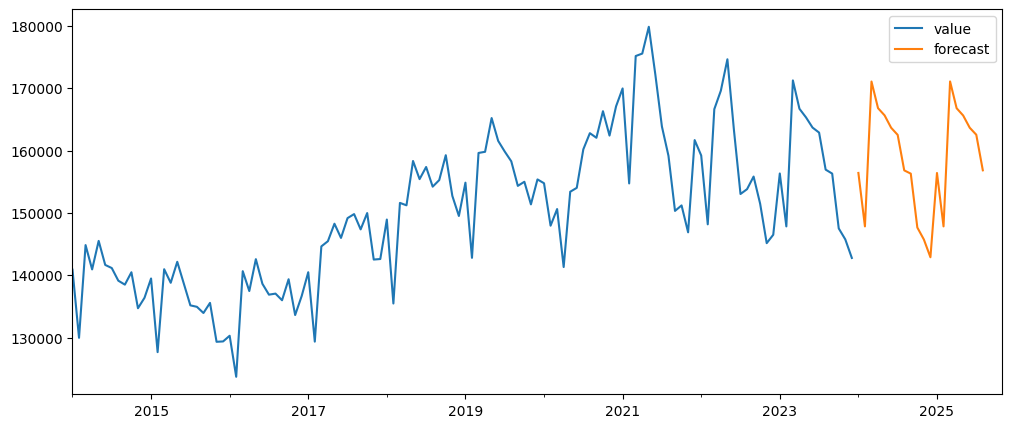

In [229]:
future_df[['value','forecast']].plot(figsize=(12,5))

In [230]:
agg_data = future_df.reset_index()
agg_data

index          value  Seasonal First Difference       forecast
0   2014-01-01  140887.513341                        NaN            NaN
1   2014-02-01  129953.978091              -10933.535251            NaN
2   2014-03-01  144832.952386               14878.974295            NaN
3   2014-04-01  140932.008760               -3900.943626            NaN
4   2014-05-01  145507.403678                4575.394918            NaN
..         ...            ...                        ...            ...
138 2025-07-01            NaN                        NaN  162542.796572
139 2025-08-01            NaN                        NaN  156831.480080
140 2025-09-01            NaN                        NaN            NaN
141 2025-10-01            NaN                        NaN            NaN
142 2025-11-01            NaN                        NaN            NaN

[143 rows x 4 columns]

In [231]:
agg_data['year'] = agg_data['index'].dt.year
agg_data

index          value  Seasonal First Difference       forecast  year
0   2014-01-01  140887.513341                        NaN            NaN  2014
1   2014-02-01  129953.978091              -10933.535251            NaN  2014
2   2014-03-01  144832.952386               14878.974295            NaN  2014
3   2014-04-01  140932.008760               -3900.943626            NaN  2014
4   2014-05-01  145507.403678                4575.394918            NaN  2014
..         ...            ...                        ...            ...   ...
138 2025-07-01            NaN                        NaN  162542.796572  2025
139 2025-08-01            NaN                        NaN  156831.480080  2025
140 2025-09-01            NaN                        NaN            NaN  2025
141 2025-10-01            NaN                        NaN            NaN  2025
142 2025-11-01            NaN                        NaN            NaN  2025

[143 rows x 5 columns]

In [232]:
data_average = agg_data.groupby(agg_data.year)['forecast'].mean()
data_average = pd.DataFrame(data_average)
data_average

forecast
year               
2014            NaN
2015            NaN
2016            NaN
2017            NaN
2018            NaN
2019            NaN
2020            NaN
2021            NaN
2022            NaN
2023            NaN
2024  156944.102783
2025  161347.878186

In [233]:
data_average_v = agg_data.groupby(agg_data.year)['value'].mean()
data_average_v = pd.DataFrame(data_average_v)
data_average_v

value
year               
2014  139507.512565
2015  135501.131163
2016  136071.241937
2017  144630.965250
2018  152441.592417
2019  156502.818972
2020  156909.822750
2021  163381.666333
2022  157276.572276
2023  156941.677015
2024            NaN
2025            NaN

In [234]:
data_average_v['forecast'] =  data_average['forecast']

In [235]:
data_average_v

value       forecast
year                              
2014  139507.512565            NaN
2015  135501.131163            NaN
2016  136071.241937            NaN
2017  144630.965250            NaN
2018  152441.592417            NaN
2019  156502.818972            NaN
2020  156909.822750            NaN
2021  163381.666333            NaN
2022  157276.572276            NaN
2023  156941.677015            NaN
2024            NaN  156944.102783
2025            NaN  161347.878186

In [236]:
data_average_v = data_average_v.reset_index()

In [237]:
data_average_v['year']

0     2014
1     2015
2     2016
3     2017
4     2018
5     2019
6     2020
7     2021
8     2022
9     2023
10    2024
11    2025
Name: year, dtype: int32

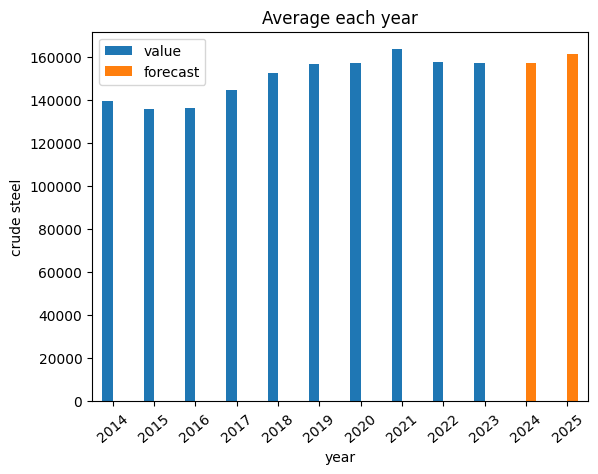

In [238]:
data_average_v.plot.bar(x = 'year', y = ['value', 'forecast'], rot = 40)
# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i], rotation = 40)

def addlabels2(c):
    for i in range(len(c)):
        plt.text(i,c[i],c[i])
        
fig = plt.figure(1, figsize=(50, 14), frameon=False, dpi=90)



# y = data_average_v['value']
# c = data_average_v['forecast']
# addlabels(y)
# addlabels(c)
plt.xlabel("year")
plt.ylabel("crude steel")
plt.title("Average each year")
plt.show()

## Globe

In [3]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [161]:
#read data
df = pd.read_excel("C:/Users/fauziah/Desktop/other/data/2013-2023_ Monthly  Steel Production Data.xlsx", 'Monthly Steel Outlook', header = 1)

#Unpivot the table
df_unpivot2 = pd.melt(df, id_vars=['Year ', 'Resoanc Regions '], value_vars=[ 'crude steel: January',
       'crude steel: February', 'crude steel: March', 'crude steel: April',
       'crude steel: May', 'crude steel: June', 'crude steel: July',
       'crude steel: August', 'crude steel: September', 'crude steel: October',
       'crude steel: November', 'crude steel: December'])
df_unpivot2.rename(columns = {'Year ':'Year'}, inplace = True)
df_unpivot2.Year = df_unpivot2.Year.astype(str)

# # selecting rows based on condition 
# df_unpivot2 = df_unpivot2[df_unpivot2['Resoanc Regions '] == 'Asia'] 

#Remove character in the value and column that we dont need 
df_unpivot2['date'] =  df_unpivot2.Year.str[0:]+ " " + df_unpivot2.variable.str[13:]
#df_unpivot2.columns = ['Year','t', 'value', 'date']
df_unpivot2 = df_unpivot2[['value', 'date']]

#Group by the date
df = df_unpivot2.groupby('date').sum().reset_index()

#Change date data type
df['date']=pd.to_datetime(df['date'])

#sort the date in ascending
df.sort_values(by='date', ascending = True, inplace = True)

#Set the index for date
df.set_index('date',inplace=True)


C:\Users\fauziah\AppData\Local\Temp\ipykernel_8224\3791403659.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date']=pd.to_datetime(df['date'])


<Axes: xlabel='date'>

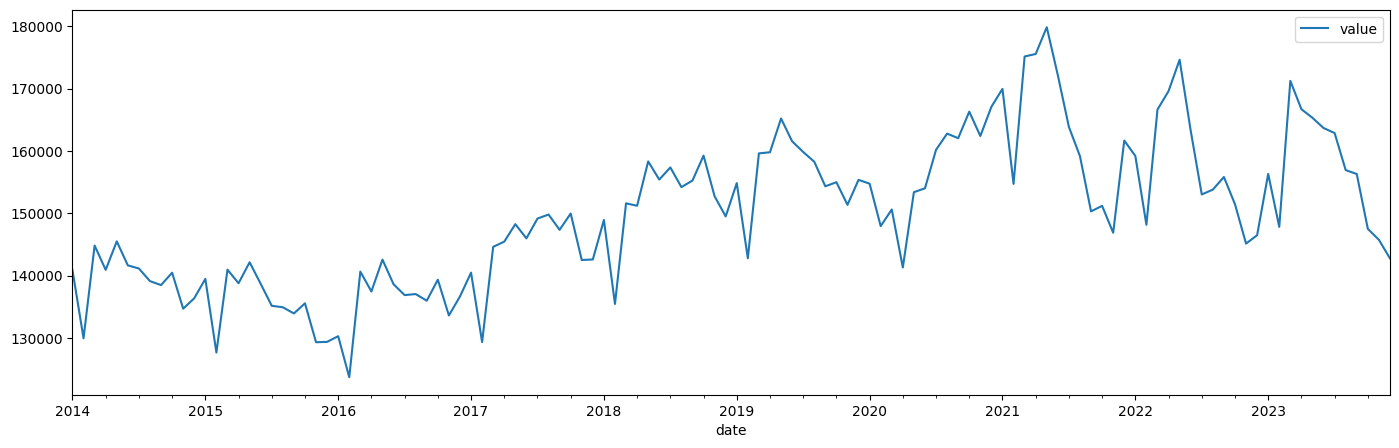

In [240]:
df.plot(figsize=(17,5))

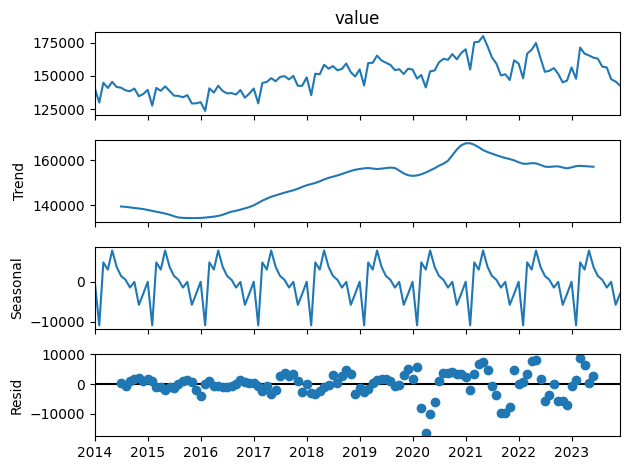

In [241]:
#Decompose Method

from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['value'],model='additive', period=12)
decompose.plot()
plt.show()


<Axes: xlabel='date'>

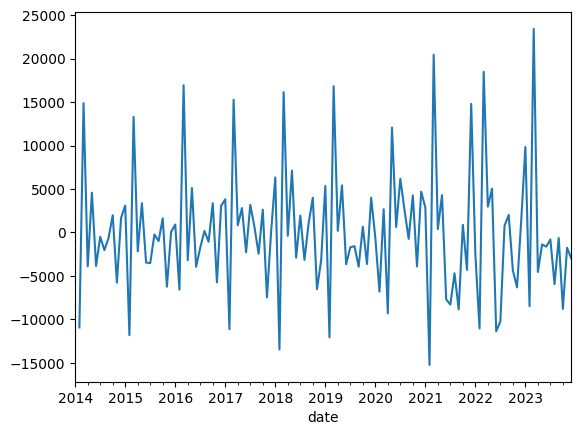

In [242]:
#df['Seasonal First Difference']=df['value']-df['value'].shift(12)
df['Seasonal First Difference'] = df['value'].diff().dropna()

df['Seasonal First Difference'].plot()

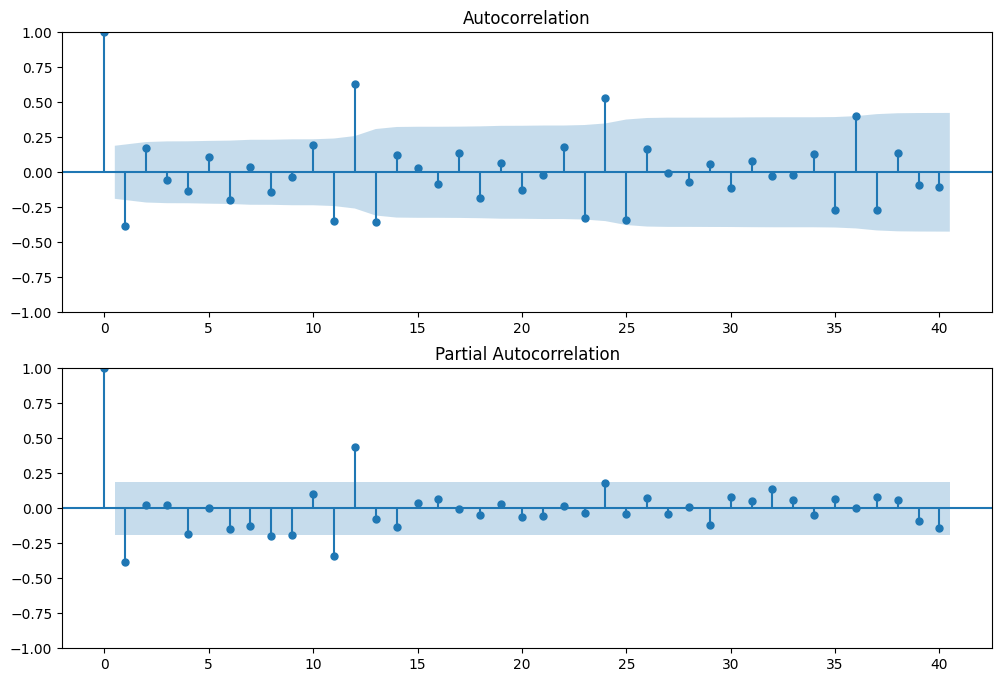

In [243]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

##### Evaluate model 

In [162]:
#MODEL 1
model=sm.tsa.statespace.SARIMAX(df['value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
results.summary()

C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting M

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1063.027
Date:                            Tue, 16 Jan 2024   AIC                           2136.054
Time:                                    10:13:33   BIC                           2149.418
Sample:                                01-01-2014   HQIC                          2141.472
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1468      3.707     -0.040      0.968      -7.413       7.120
ma.L1          0.1699      3.707      0.046      0.963      -7.096       7.435
ar.S.L12       0.6616      0.112      5.909      0.000       0.442       0.881
ma.S.L12      -0.9117      0.163     -5.593      0.000      -1.231      -0.592
sigma2      2.804e+07   5.46e-07   5.13e+13      0.000     2.8e+07     2.8e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.24
Prob(Q):                              0.99   Prob(JB):                         0.33
Heteroskedasticity (H):               7.30   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.74e+29. Standard errors may be unstable.
"""

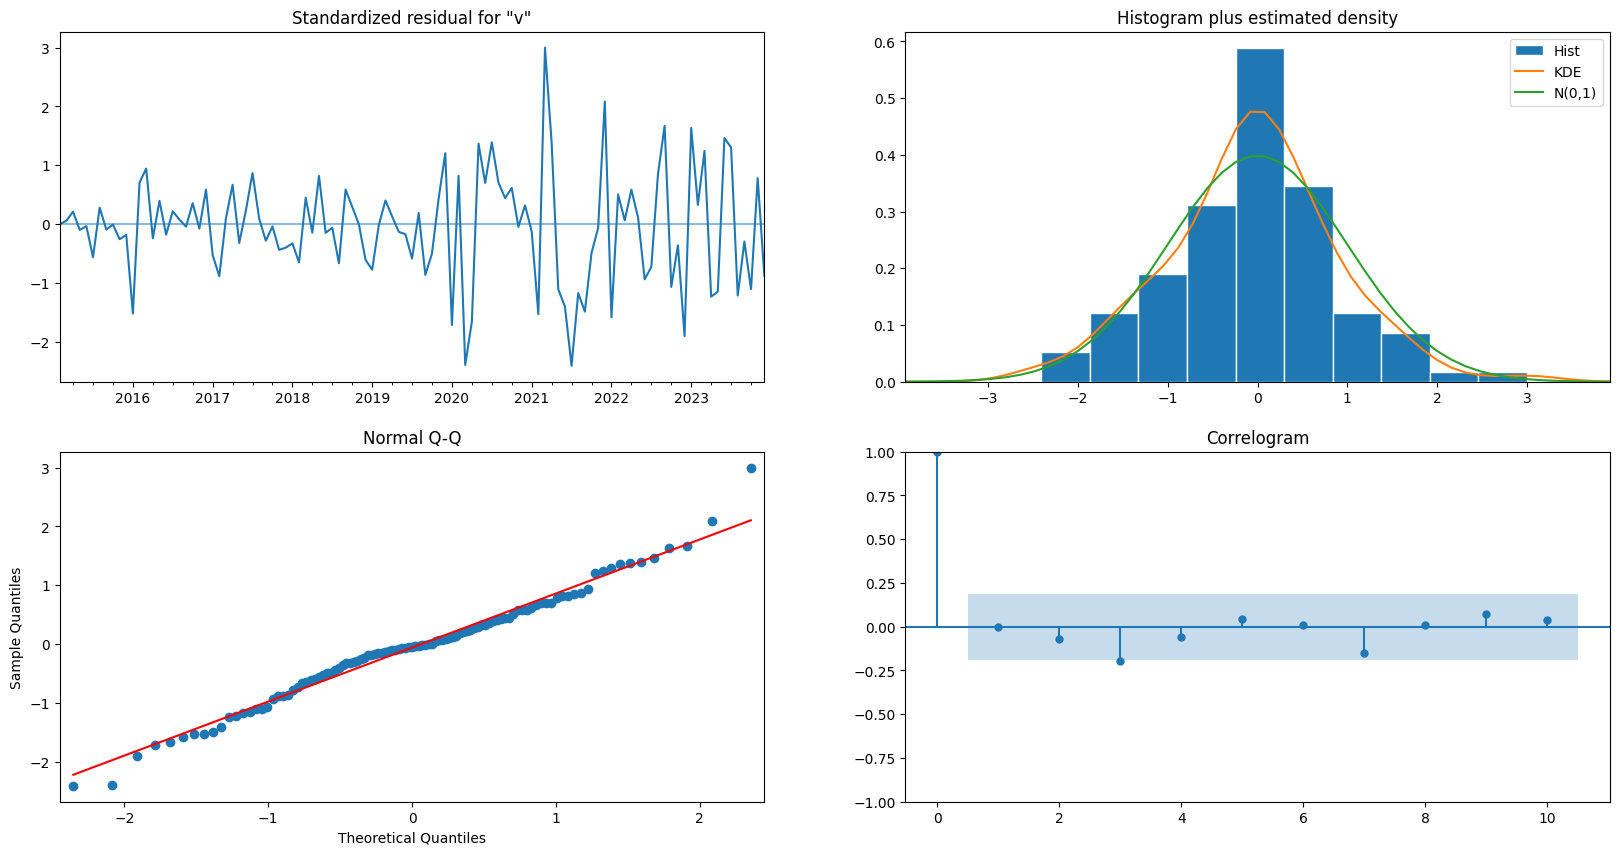

In [23]:
results.plot_diagnostics(figsize=(20, 10))
plt.show()

<Axes: xlabel='date'>

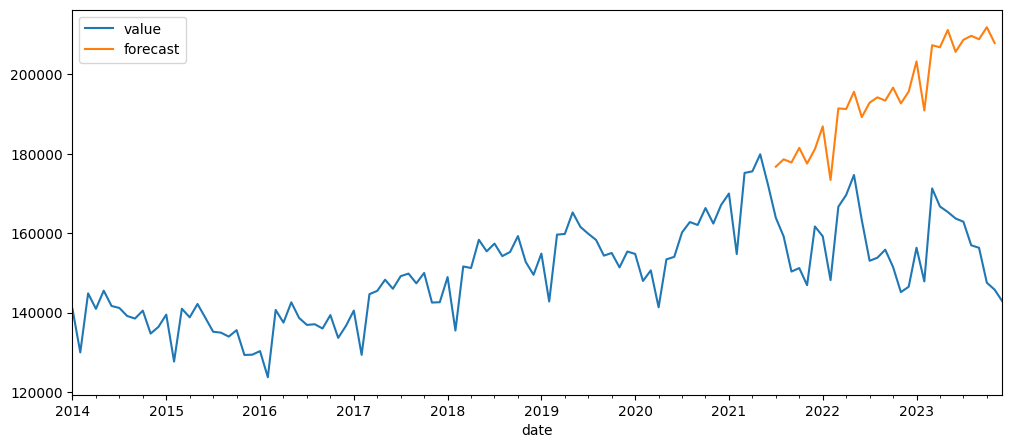

In [24]:
df['forecast']=results.predict(start=90,end=118,dynamic=True)
df[['value','forecast']].plot(figsize=(12,5))

In [19]:
#MODEL 2
model2=sm.tsa.statespace.SARIMAX(df['value'],order=(1, 0, 1),seasonal_order=(1,1,1,12))
results2=model2.fit()
results2.summary()

C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  120
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -1137.338
Date:                            Tue, 16 Jan 2024   AIC                           2284.675
Time:                                    08:45:08   BIC                           2298.086
Sample:                                01-01-2014   HQIC                          2290.113
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2634      0.072      3.636      0.000       0.121       0.405
ma.L1          0.0567      0.091      0.625      0.532      -0.121       0.235
ar.S.L12      -0.0836      0.221     -0.378      0.705      -0.517       0.349
ma.S.L12       0.0065      0.226      0.029      0.977      -0.437       0.450
sigma2       2.56e+07    1.1e-08   2.32e+15      0.000    2.56e+07    2.56e+07
===================================================================================
Ljung-Box (L1) (Q):                  25.11   Jarque-Bera (JB):                98.98
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                            -0.83
Prob(H) (two-sided):                  0.32   Kurtosis:                         7.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.92e+30. Standard errors may be unstable.
"""

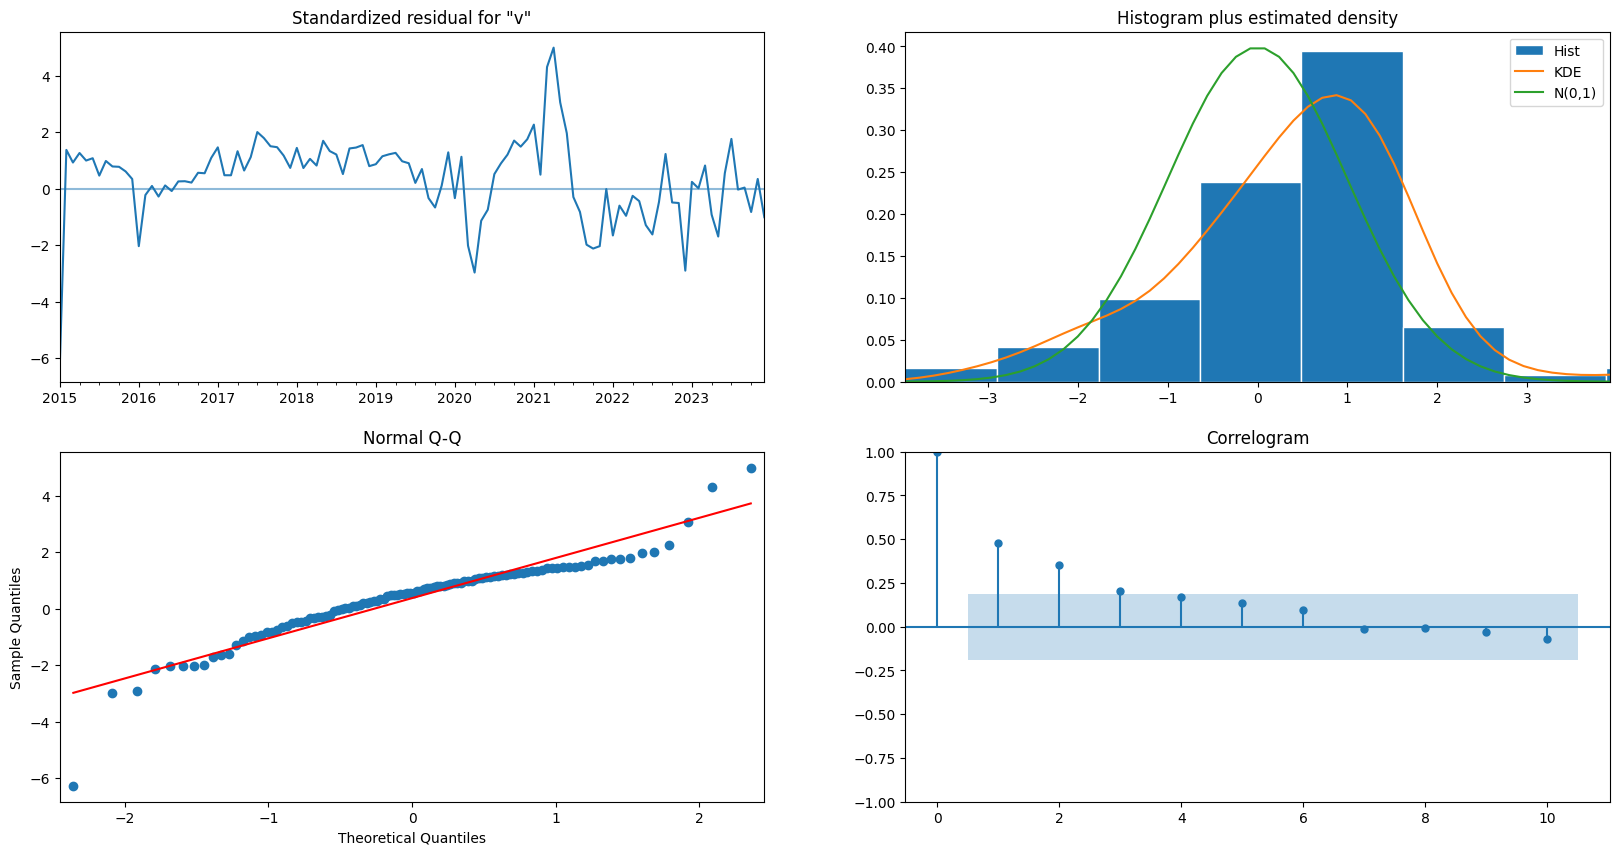

In [20]:
results2.plot_diagnostics(figsize=(20, 10))
plt.show()

##### Prediction

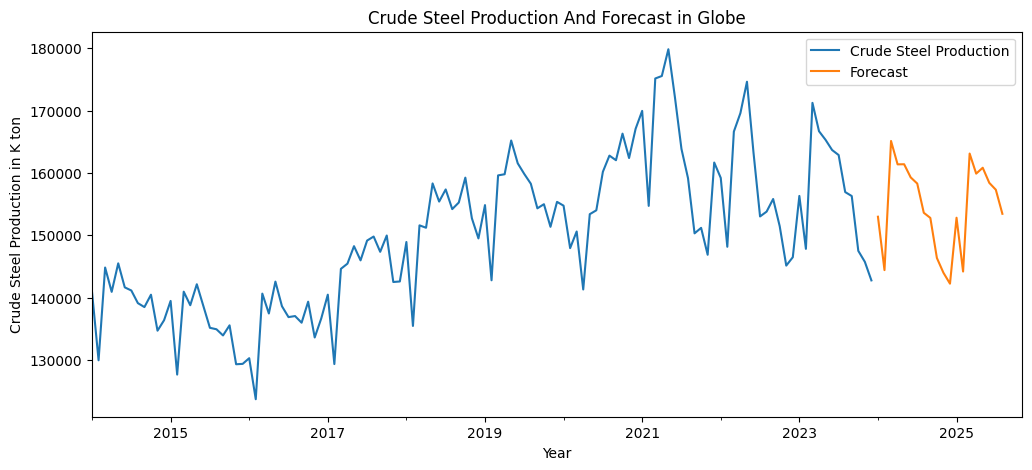

In [163]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 120, end = 139, dynamic= True)  
future_df

#PLOT THE RESULT
future_df[['value','forecast']].plot(figsize=(12,5))
plt.xlabel("Year")
plt.ylabel("Crude Steel Production in K ton")
plt.title("Crude Steel Production And Forecast in Globe")

plt.legend(['Crude Steel Production','Forecast']) 

In [164]:
#average by year, value and forecast

agg_data = future_df.reset_index()

agg_data['year'] = agg_data['index'].dt.year

data_average = agg_data.groupby(agg_data.year)['forecast'].mean()
data_average = pd.DataFrame(data_average)

data_average_v = agg_data.groupby(agg_data.year)['value'].mean()
data_average_v = pd.DataFrame(data_average_v)

data_average_v['forecast'] =  data_average['forecast']

data_average_v = data_average_v.reset_index()

data_average_v


year          value       forecast
0   2014  139507.512565            NaN
1   2015  135501.131163            NaN
2   2016  136071.241937            NaN
3   2017  144630.965250            NaN
4   2018  152441.592417            NaN
5   2019  156502.818972            NaN
6   2020  156909.822750            NaN
7   2021  163381.666333            NaN
8   2022  157276.572276            NaN
9   2023  156941.677015            NaN
10  2024            NaN  153498.082419
11  2025            NaN  156260.455790

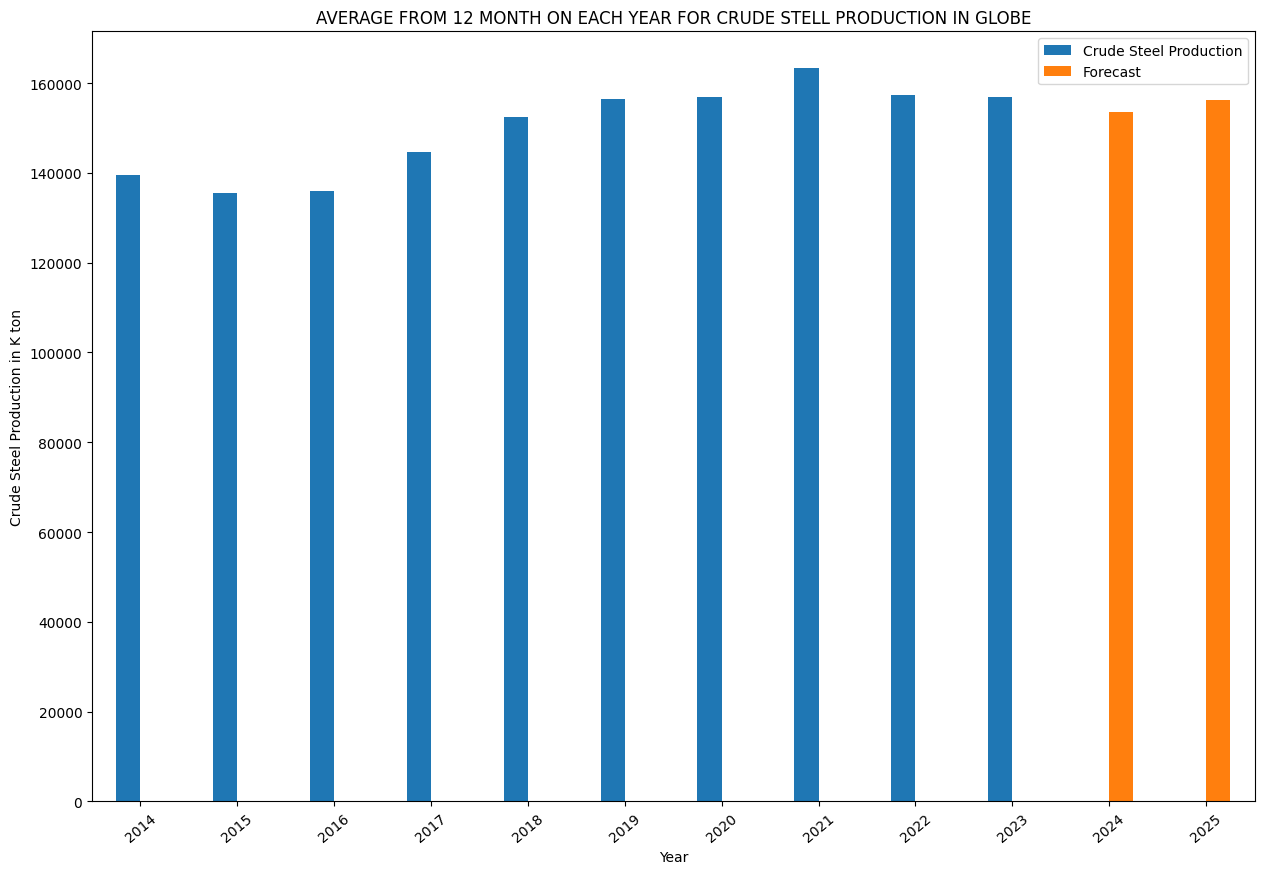

In [179]:
#plot

data_average_v.plot.bar(x = 'year', y = ['value', 'forecast'], rot = 40,figsize=(15, 10))
# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i], rotation = 40)

def addlabels2(c):
    for i in range(len(c)):
        plt.text(i,c[i],c[i])
        
#fig = plt.figure(1, figsize=(50, 40), frameon=False, dpi=90)

# #remove decimal point
# data_average_v = data_average_v.fillna(0)
# data_average_v['value'] = data_average_v['value'].astype(int)
# data_average_v['forecast'] = data_average_v['forecast'].astype(int)

#print with label
# y = data_average_v['value']
# c = data_average_v['forecast']
# addlabels(y)
# addlabels(c)
plt.xlabel("Year")
plt.ylabel("Crude Steel Production in K ton")
plt.title("AVERAGE FROM 12 MONTH ON EACH YEAR FOR CRUDE STELL PRODUCTION IN GLOBE")
plt.legend(['Crude Steel Production','Forecast']) 
plt.show()

# ASIA WITHOUT CHINA

In [180]:
#read data
df = pd.read_excel("C:/Users/fauziah/Desktop/other/data/2013-2023_ Monthly  Steel Production Data.xlsx", 'Monthly Steel Outlook', header = 1)

#Unpivot the table
df_unpivot2 = pd.melt(df, id_vars=['Year ', 'Resoanc Regions '], value_vars=[ 'crude steel: January',
       'crude steel: February', 'crude steel: March', 'crude steel: April',
       'crude steel: May', 'crude steel: June', 'crude steel: July',
       'crude steel: August', 'crude steel: September', 'crude steel: October',
       'crude steel: November', 'crude steel: December'])
df_unpivot2.rename(columns = {'Year ':'Year'}, inplace = True)
df_unpivot2.Year = df_unpivot2.Year.astype(str)

# selecting rows based on condition 
df_unpivot2 = df_unpivot2[df_unpivot2['Resoanc Regions '] == 'Asia'] 

#Remove character in the value and column that we dont need 
df_unpivot2['date'] =  df_unpivot2.Year.str[0:]+ " " + df_unpivot2.variable.str[13:]
#df_unpivot2.columns = ['Year','t', 'value', 'date']
df_unpivot2 = df_unpivot2[['value', 'date']]

#Group by the date
df = df_unpivot2.groupby('date').sum().reset_index()

#Change date data type
df['date']=pd.to_datetime(df['date'])

#sort the date in ascending
df.sort_values(by='date', ascending = True, inplace = True)

#Set the index for date
df.set_index('date',inplace=True)

C:\Users\fauziah\AppData\Local\Temp\ipykernel_8224\2087098812.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date']=pd.to_datetime(df['date'])


In [32]:
df

value
date                    
2014-01-01  19497.900000
2014-02-01  17807.314000
2014-03-01  20309.327000
2014-04-01  19209.370000
2014-05-01  19971.517000
...                  ...
2023-08-01  19360.406633
2023-09-01  19258.351268
2023-10-01  19054.511848
2023-11-01  18911.657873
2023-12-01  18732.857801

[120 rows x 1 columns]

<Axes: xlabel='date'>

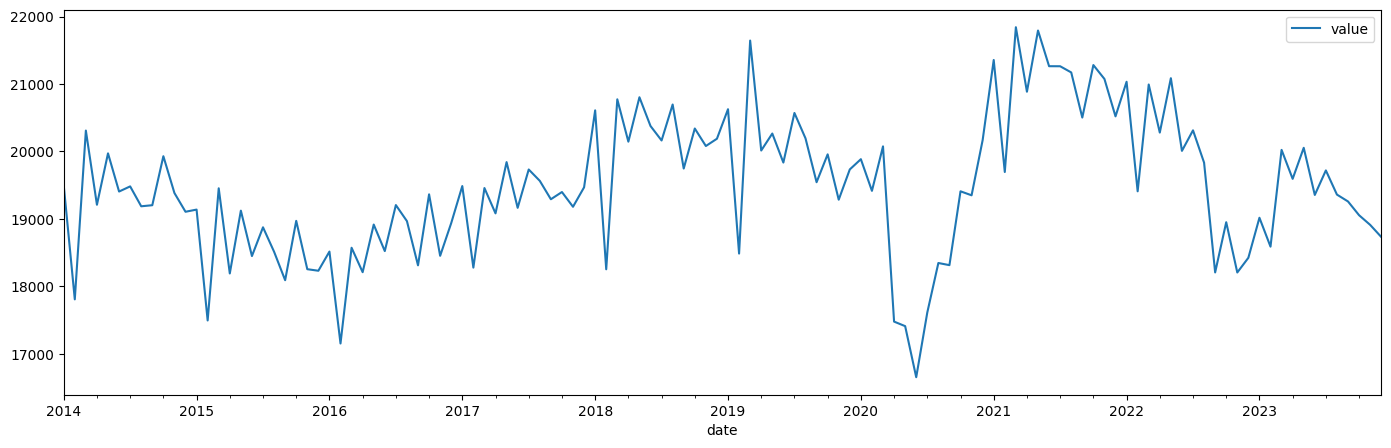

In [33]:
df.plot(figsize=(17,5))

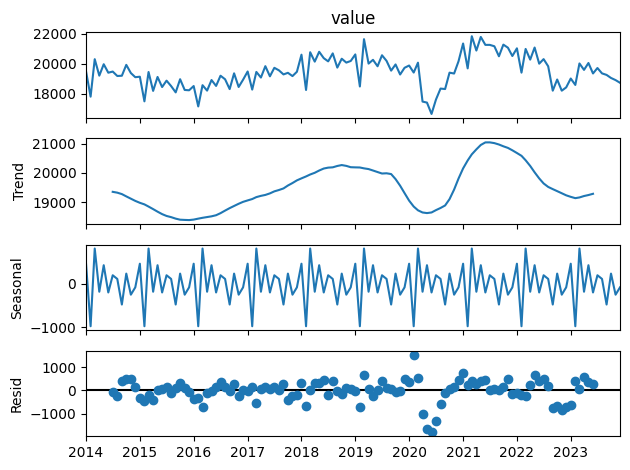

In [34]:
#Decompose Method

from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['value'],model='additive', period=12)
decompose.plot()
plt.show()


<Axes: xlabel='date'>

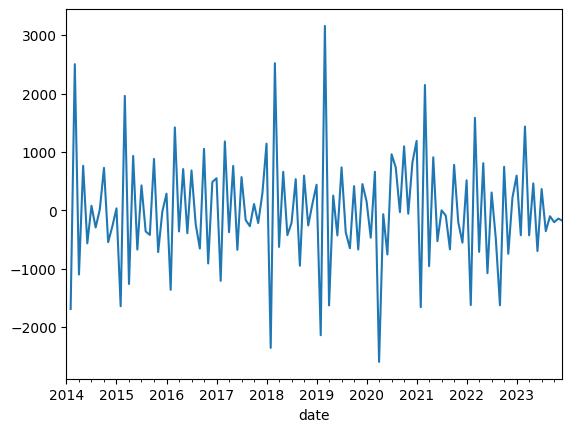

In [35]:
#df['Seasonal First Difference']=df['value']-df['value'].shift(12)
df['Seasonal First Difference'] = df['value'].diff().dropna()

df['Seasonal First Difference'].plot()

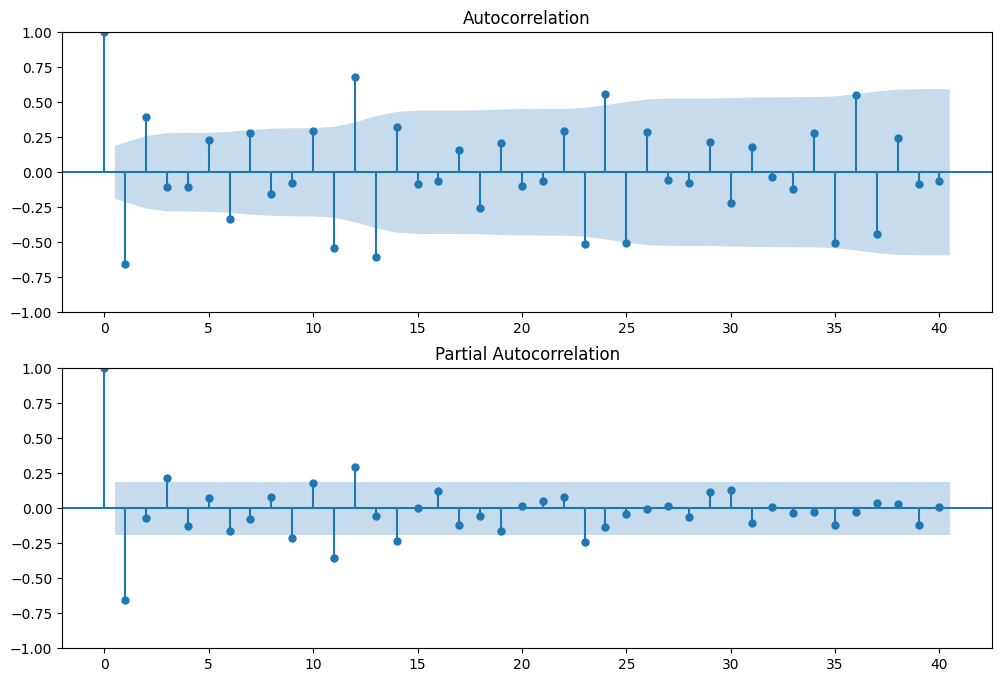

In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)


#### Evaluate Model

In [181]:
#run model, use value because already set in the order = p,d,q = 1,2,1
model=sm.tsa.statespace.SARIMAX(df['value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
results.summary()


C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -828.647
Date:                            Tue, 16 Jan 2024   AIC                           1667.293
Time:                                    10:46:29   BIC                           1680.657
Sample:                                01-01-2014   HQIC                          1672.711
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5822      0.470     -1.239      0.215      -1.503       0.339
ma.L1          0.4789      0.502      0.953      0.341      -0.506       1.464
ar.S.L12       0.2173      0.060      3.623      0.000       0.100       0.335
ma.S.L12      -0.9964      0.109     -9.173      0.000      -1.209      -0.784
sigma2       2.14e+05   5.22e-07    4.1e+11      0.000    2.14e+05    2.14e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 3.41
Prob(Q):                              0.59   Prob(JB):                         0.18
Heteroskedasticity (H):               1.66   Skew:                            -0.32
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.19e+28. Standard errors may be unstable.
"""

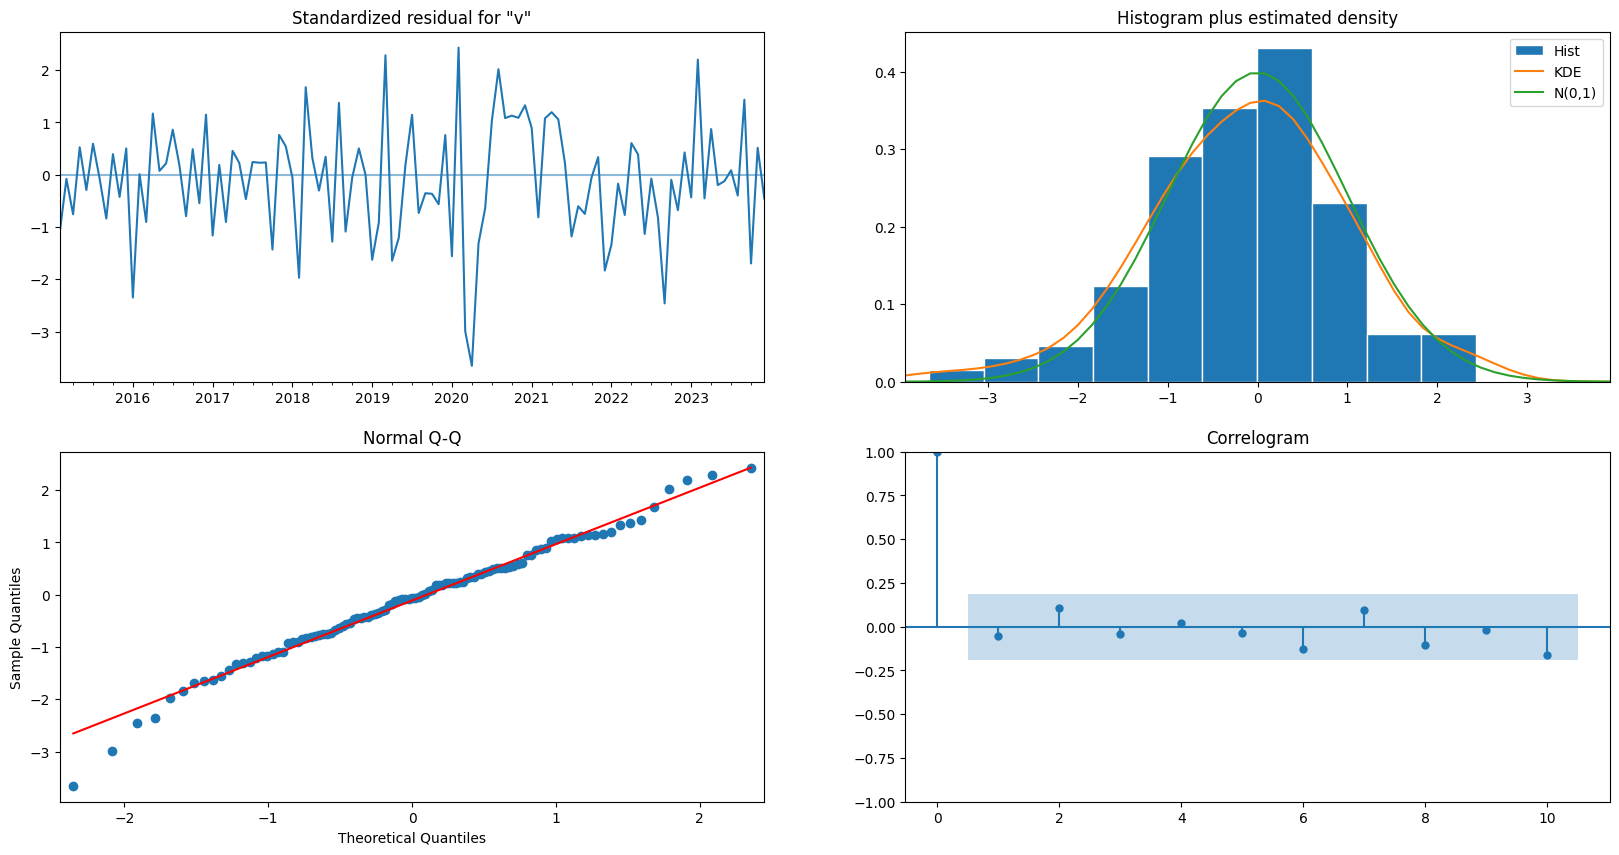

In [182]:
results.plot_diagnostics(figsize=(20, 10))
plt.show()

<Axes: xlabel='date'>

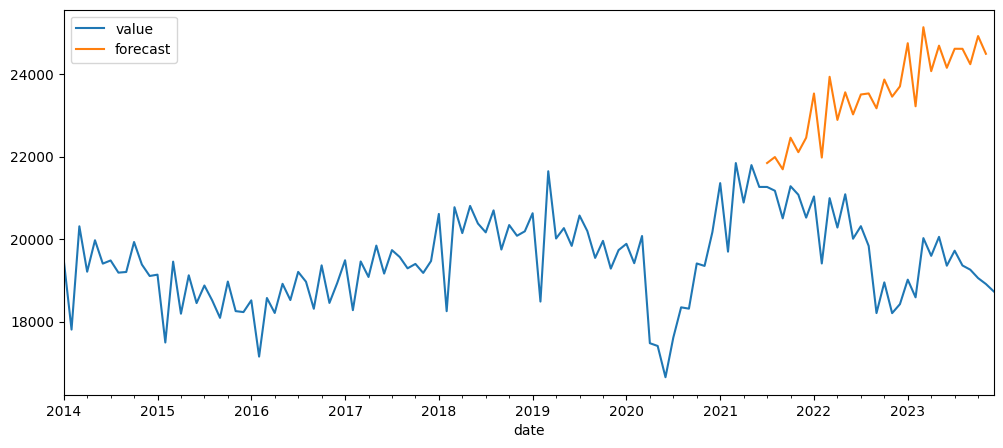

In [51]:
df['forecast']=results.predict(start=90,end=118,dynamic=True)
df[['value','forecast']].plot(figsize=(12,5))

In [45]:
# MODEL 2 
#run model, use value because already set in the order = p,d,q = 1,2,1
model2=sm.tsa.statespace.SARIMAX(df['value'],order=(1, 0, 1),seasonal_order=(1,1,1,12))
results2=model.fit()
results2.summary()

C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  120
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -888.428
Date:                            Tue, 16 Jan 2024   AIC                           1786.856
Time:                                    08:51:23   BIC                           1800.266
Sample:                                01-01-2014   HQIC                          1792.293
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5127      0.050     10.259      0.000       0.415       0.611
ma.L1          0.0293      0.089      0.329      0.742      -0.145       0.204
ar.S.L12      -0.0337      0.256     -0.132      0.895      -0.535       0.468
ma.S.L12      -0.1529      0.268     -0.571      0.568      -0.678       0.372
sigma2      5.951e+05   8.84e+04      6.731      0.000    4.22e+05    7.68e+05
===================================================================================
Ljung-Box (L1) (Q):                  12.21   Jarque-Bera (JB):                97.72
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -1.05
Prob(H) (two-sided):                  0.89   Kurtosis:                         7.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

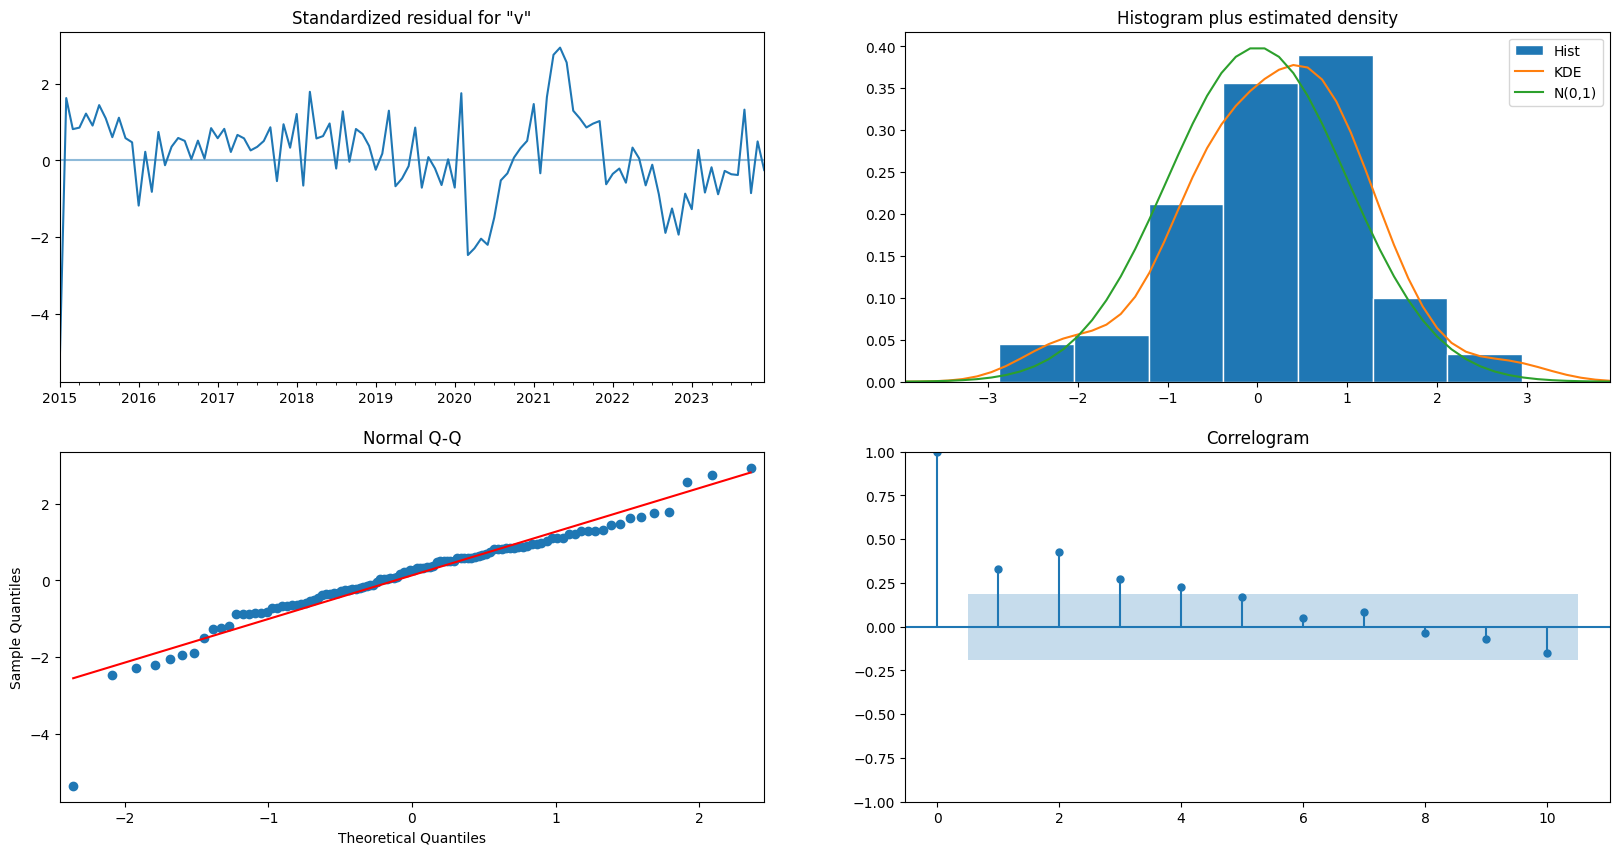

In [46]:
results2.plot_diagnostics(figsize=(20, 10))
plt.show()

<Axes: xlabel='date'>

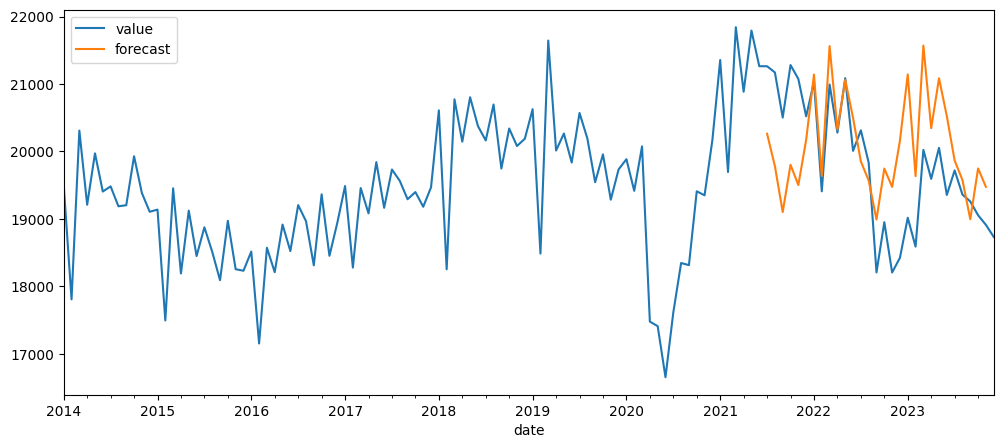

In [47]:
df['forecast']=results2.predict(start=90,end=118,dynamic=True)
df[['value','forecast']].plot(figsize=(12,5))

#### Final model for Prediction

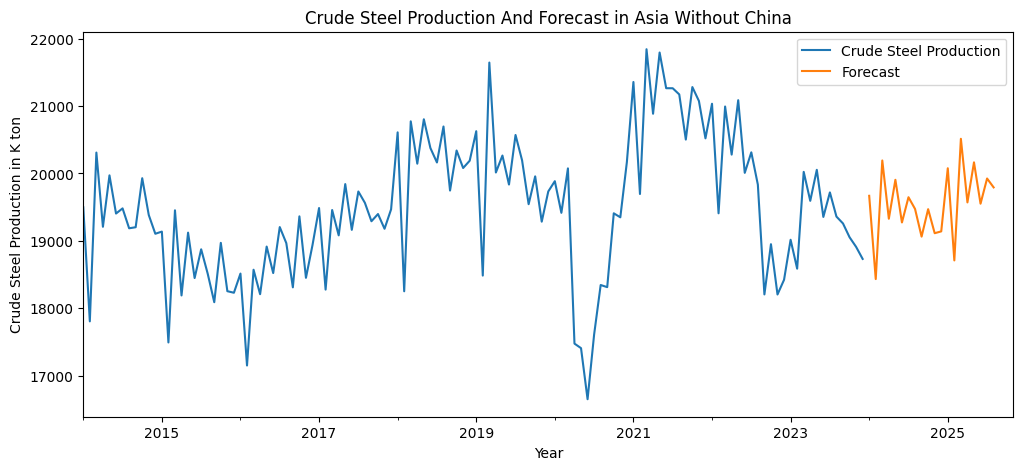

In [184]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 120, end = 139, dynamic= True)  
future_df

future_df[['value','forecast']].plot(figsize=(12,5))
plt.xlabel("Year")
plt.ylabel("Crude Steel Production in K ton")
plt.title("Crude Steel Production And Forecast in Asia Without China")

plt.legend(['Crude Steel Production','Forecast']) 

In [53]:
#average by year, value and forecast

agg_data = future_df.reset_index()

agg_data['year'] = agg_data['index'].dt.year

data_average = agg_data.groupby(agg_data.year)['forecast'].mean()
data_average = pd.DataFrame(data_average)

data_average_v = agg_data.groupby(agg_data.year)['value'].mean()
data_average_v = pd.DataFrame(data_average_v)

data_average_v['forecast'] =  data_average['forecast']

data_average_v = data_average_v.reset_index()

data_average_v

year         value      forecast
0   2014  19374.252423           NaN
1   2015  18565.537667           NaN
2   2016  18594.089750           NaN
3   2017  19328.669583           NaN
4   2018  20180.996250           NaN
5   2019  20012.681417           NaN
6   2020  18676.435167           NaN
7   2021  21053.506333           NaN
8   2022  19728.420223           NaN
9   2023  19305.632513           NaN
10  2024           NaN  19392.671583
11  2025           NaN  19788.128418

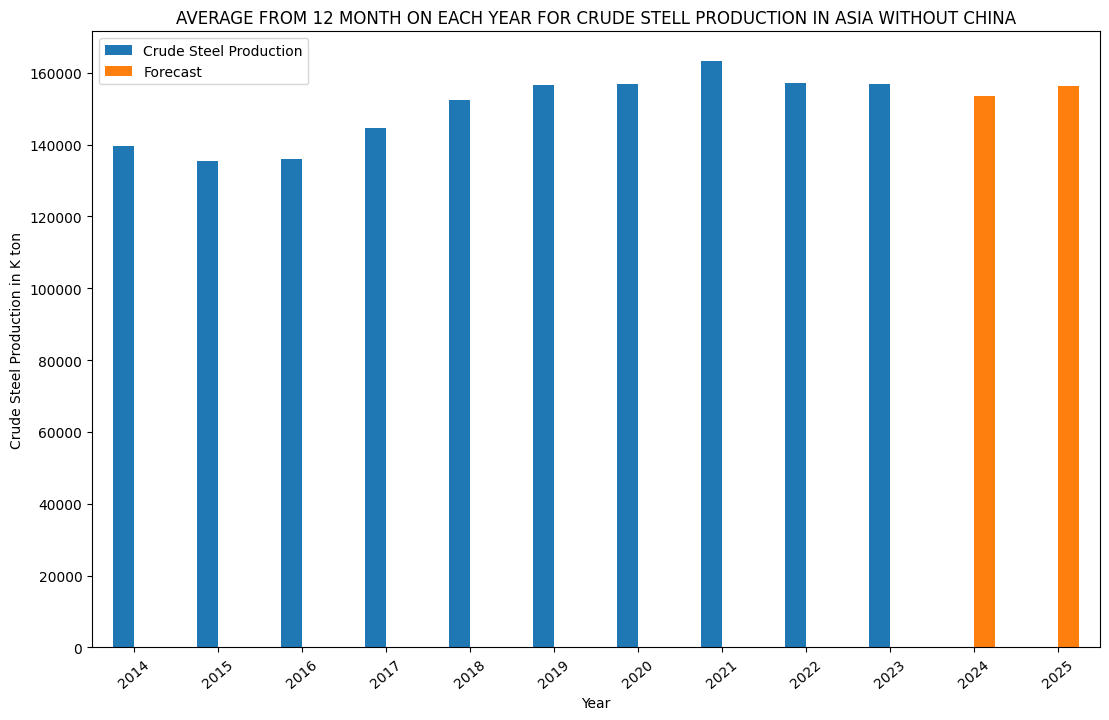

In [185]:
#plot

data_average_v.plot.bar(x = 'year', y = ['value', 'forecast'], rot = 40,figsize=(13, 8))
# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i], rotation = 40)

def addlabels2(c):
    for i in range(len(c)):
        plt.text(i,c[i],c[i])
        
#fig = plt.figure(1, figsize=(50, 40), frameon=False, dpi=90)

# #remove decimal point
# data_average_v = data_average_v.fillna(0)
# data_average_v['value'] = data_average_v['value'].astype(int)
# data_average_v['forecast'] = data_average_v['forecast'].astype(int)

#print with label
# y = data_average_v['value']
# c = data_average_v['forecast']
# addlabels(y)
# addlabels(c)
plt.xlabel("Year")
plt.ylabel("Crude Steel Production in K ton")
plt.title("AVERAGE FROM 12 MONTH ON EACH YEAR FOR CRUDE STELL PRODUCTION IN ASIA WITHOUT CHINA")
plt.legend(['Crude Steel Production','Forecast']) 
plt.show()

# EMEA

In [191]:
#read data
df = pd.read_excel("C:/Users/fauziah/Desktop/other/data/2013-2023_ Monthly  Steel Production Data.xlsx", 'Monthly Steel Outlook', header = 1)

#Unpivot the table
df_unpivot2 = pd.melt(df, id_vars=['Year ', 'Resoanc Regions '], value_vars=[ 'crude steel: January',
       'crude steel: February', 'crude steel: March', 'crude steel: April',
       'crude steel: May', 'crude steel: June', 'crude steel: July',
       'crude steel: August', 'crude steel: September', 'crude steel: October',
       'crude steel: November', 'crude steel: December'])
df_unpivot2.rename(columns = {'Year ':'Year'}, inplace = True)
df_unpivot2.Year = df_unpivot2.Year.astype(str)

# selecting rows based on condition 
df_unpivot2 = df_unpivot2[df_unpivot2['Resoanc Regions '] == 'EMEA'] 

#Remove character in the value and column that we dont need 
df_unpivot2['date'] =  df_unpivot2.Year.str[0:]+ " " + df_unpivot2.variable.str[13:]
#df_unpivot2.columns = ['Year','t', 'value', 'date']
df_unpivot2 = df_unpivot2[['value', 'date']]

#Group by the date
df = df_unpivot2.groupby('date').sum().reset_index()

#Change date data type
df['date']=pd.to_datetime(df['date'])

#sort the date in ascending
df.sort_values(by='date', ascending = True, inplace = True)

#Set the index for date
df.set_index('date',inplace=True)

C:\Users\fauziah\AppData\Local\Temp\ipykernel_8224\1753819999.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date']=pd.to_datetime(df['date'])


<Axes: xlabel='date'>

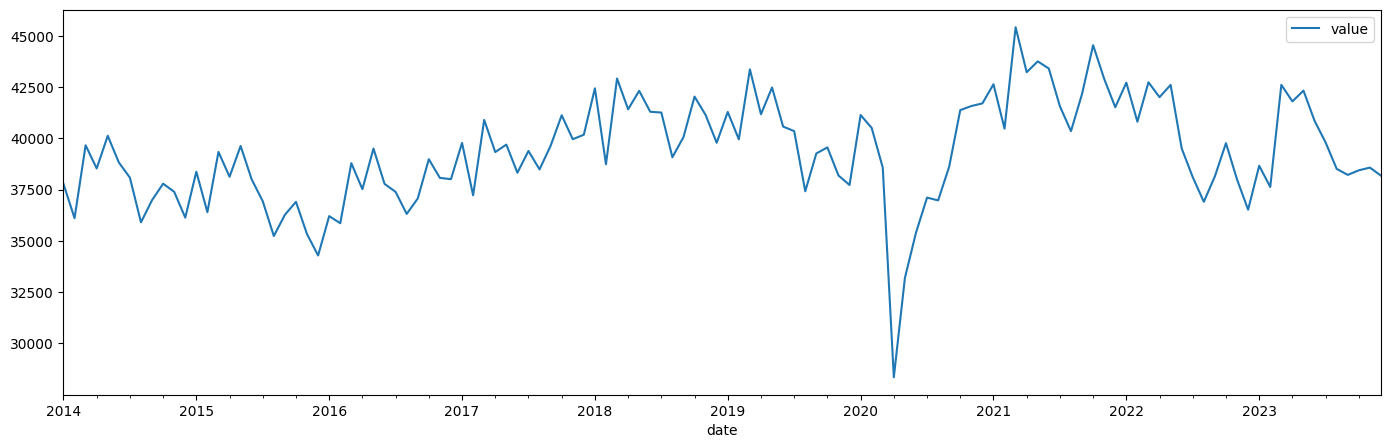

In [87]:
df.plot(figsize=(17,5))

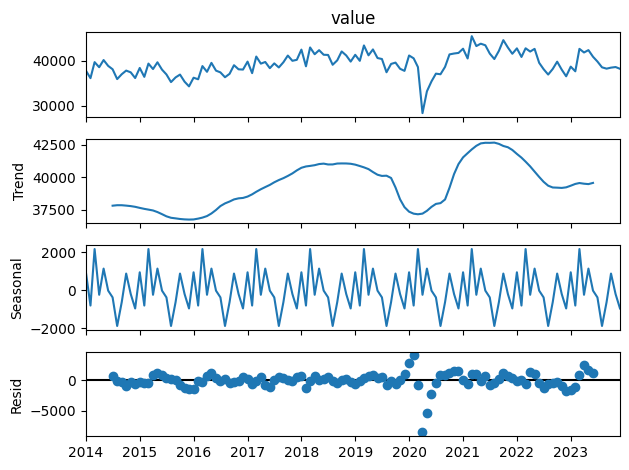

In [88]:
#Decompose Method

from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['value'],model='additive', period=12)
decompose.plot()
plt.show()


<Axes: xlabel='date'>

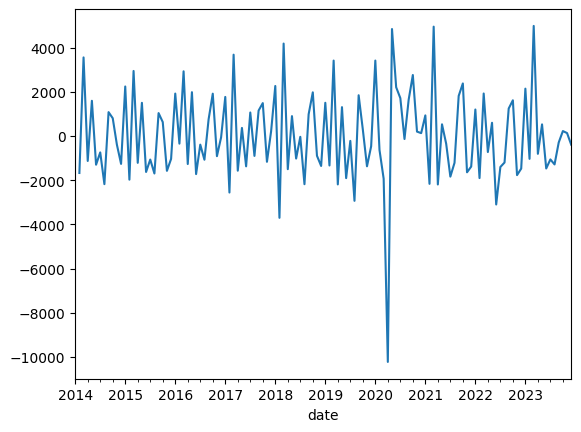

In [89]:
#df['Seasonal First Difference']=df['value']-df['value'].shift(12)
df['Seasonal First Difference'] = df['value'].diff().dropna()

df['Seasonal First Difference'].plot()

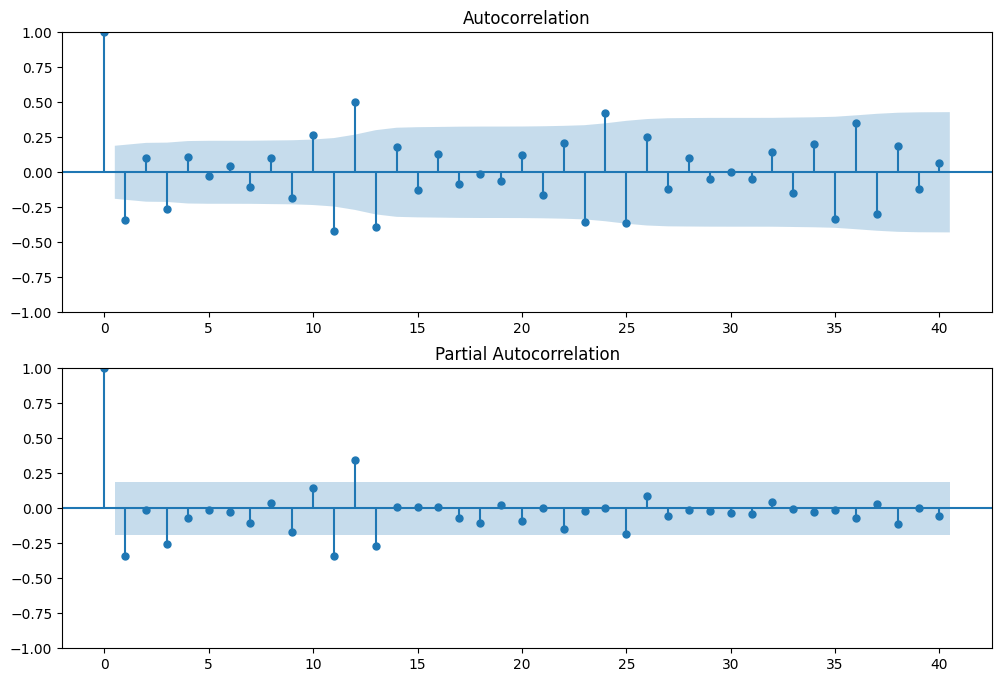

In [90]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

#### Evaluate model

In [192]:
#MODEL 1
model=sm.tsa.statespace.SARIMAX(df['value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
results.summary()


C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -947.423
Date:                            Tue, 16 Jan 2024   AIC                           1904.846
Time:                                    10:51:57   BIC                           1918.210
Sample:                                01-01-2014   HQIC                          1910.264
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4344      0.393     -1.105      0.269      -1.205       0.336
ma.L1          0.5598      0.396      1.415      0.157      -0.216       1.335
ar.S.L12       0.5065      0.049     10.342      0.000       0.411       0.603
ma.S.L12      -0.9891      0.094    -10.540      0.000      -1.173      -0.805
sigma2      2.457e+06   3.95e-08   6.23e+13      0.000    2.46e+06    2.46e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):                96.08
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               2.53   Skew:                            -0.71
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.79e+30. Standard errors may be unstable.
"""

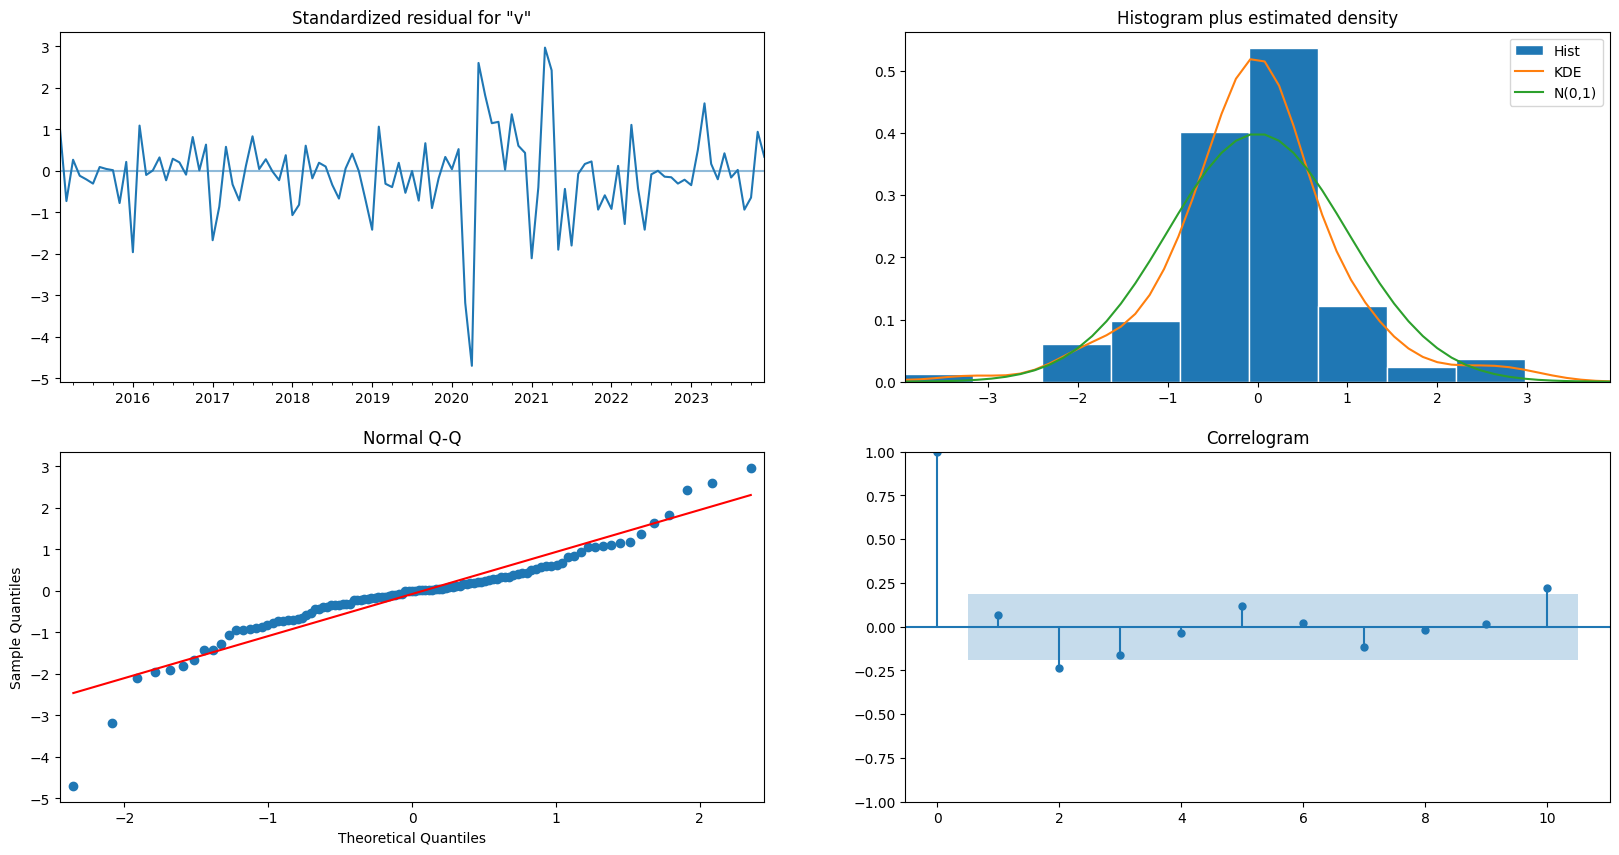

In [115]:
results.plot_diagnostics(figsize=(20, 10))
plt.show()

<Axes: xlabel='date'>

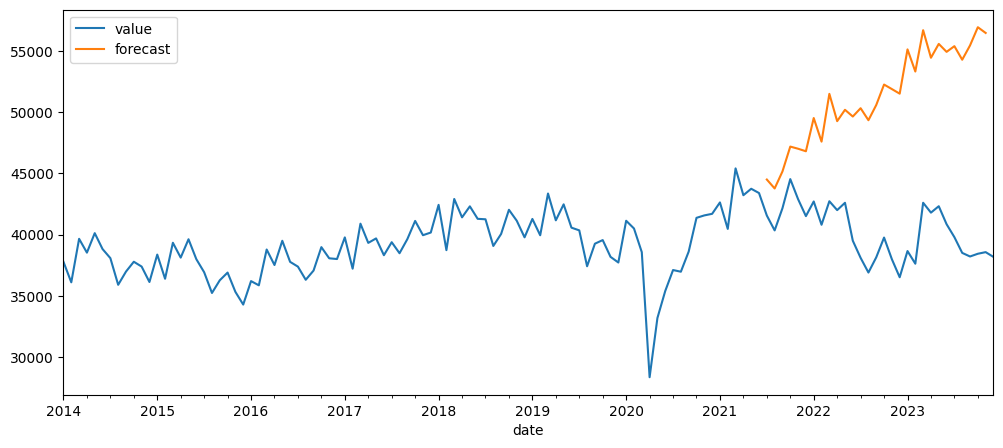

In [193]:
df['forecast']=results.predict(start=90,end=118,dynamic=True)
df[['value','forecast']].plot(figsize=(12,5))

In [110]:
#MODEL 2

model2=sm.tsa.statespace.SARIMAX(df['value'],order=(1, 0, 1),seasonal_order=(1,1,1,12))
results2=model.fit()
results2.summary()

C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -947.423
Date:                            Tue, 16 Jan 2024   AIC                           1904.846
Time:                                    09:32:15   BIC                           1918.210
Sample:                                01-01-2014   HQIC                          1910.264
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4344      0.393     -1.105      0.269      -1.205       0.336
ma.L1          0.5598      0.396      1.415      0.157      -0.216       1.335
ar.S.L12       0.5065      0.049     10.342      0.000       0.411       0.603
ma.S.L12      -0.9891      0.094    -10.540      0.000      -1.173      -0.805
sigma2      2.457e+06   3.95e-08   6.23e+13      0.000    2.46e+06    2.46e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):                96.08
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               2.53   Skew:                            -0.71
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.79e+30. Standard errors may be unstable.
"""

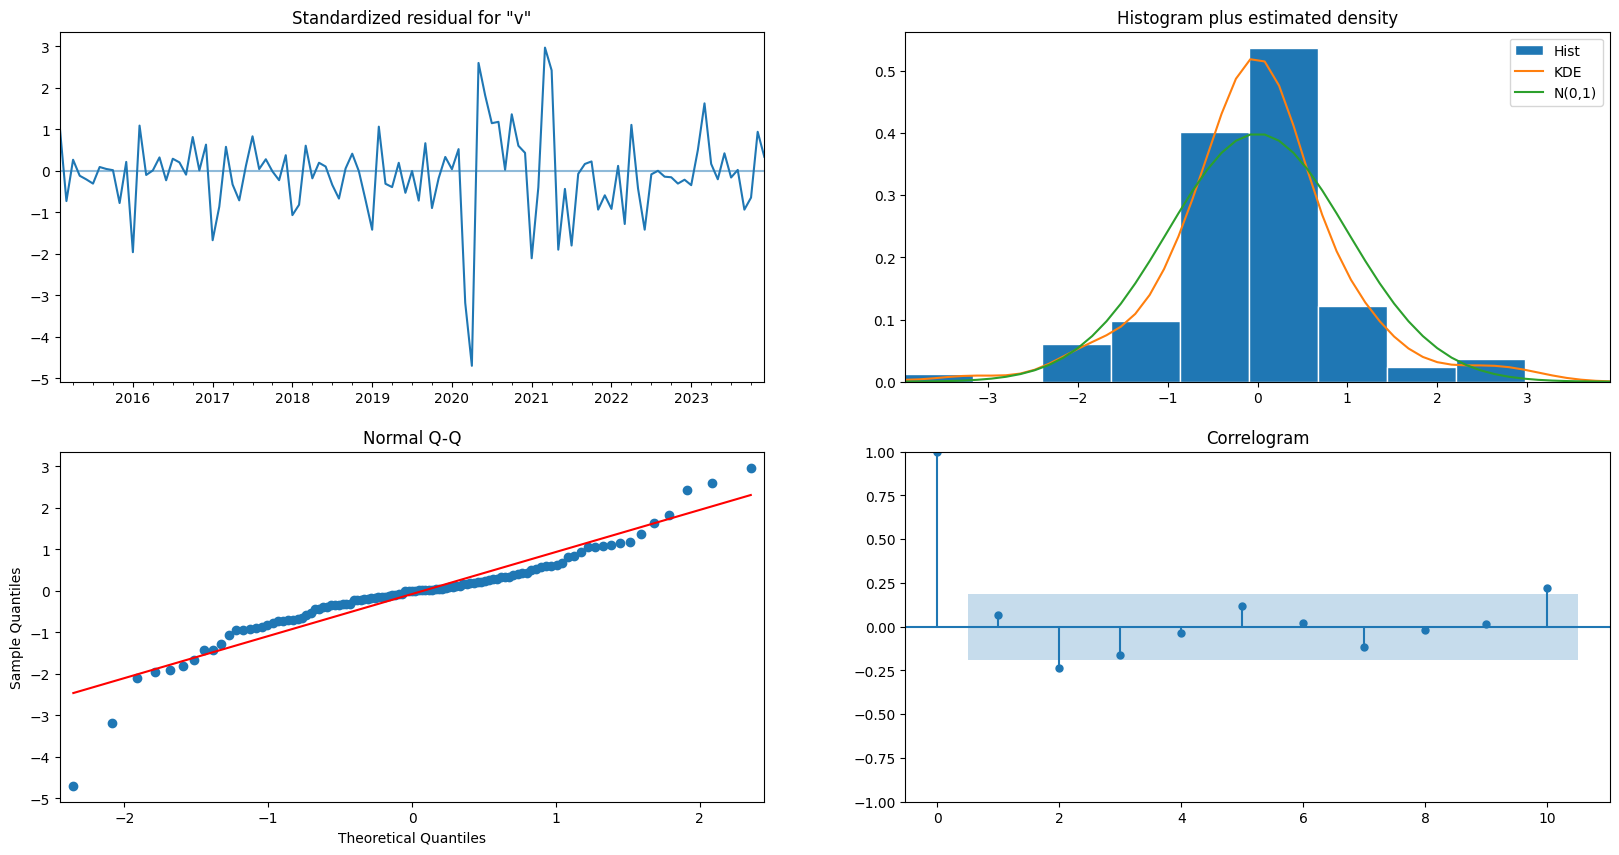

In [111]:
results2.plot_diagnostics(figsize=(20, 10))
plt.show()


<Axes: xlabel='date'>

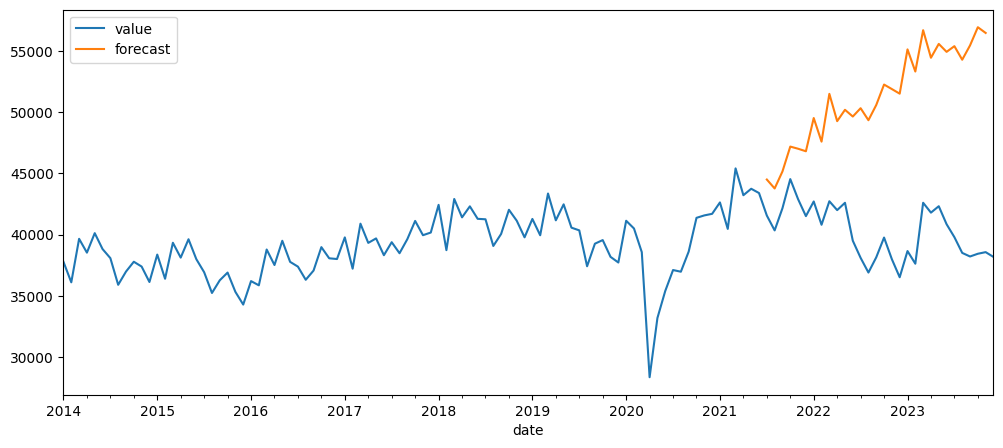

In [112]:
df['forecast']=results2.predict(start=90,end=118,dynamic=True)
df[['value','forecast']].plot(figsize=(12,5))

#### Final model for Prediction

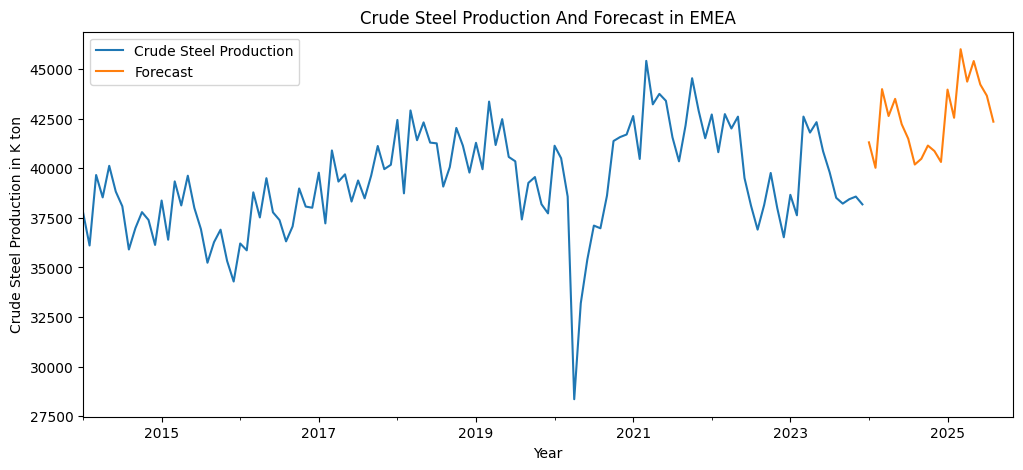

In [195]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 120, end = 139, dynamic= True)  
future_df



future_df[['value','forecast']].plot(figsize=(12,5))
plt.xlabel("Year")
plt.ylabel("Crude Steel Production in K ton")
plt.title("Crude Steel Production And Forecast in EMEA")

plt.legend(['Crude Steel Production','Forecast']) 

In [198]:
#average by year, value and forecast

agg_data = future_df.reset_index()

agg_data['year'] = agg_data['index'].dt.year

data_average = agg_data.groupby(agg_data.year)['forecast'].mean()
data_average = pd.DataFrame(data_average)

data_average_v = agg_data.groupby(agg_data.year)['value'].mean()
data_average_v = pd.DataFrame(data_average_v)

data_average_v['forecast'] =  data_average['forecast']

data_average_v = data_average_v.reset_index()

data_average_v


year         value      forecast
0   2014  37777.727884           NaN
1   2015  37069.986409           NaN
2   2016  37625.572187           NaN
3   2017  39501.448083           NaN
4   2018  41039.846083           NaN
5   2019  40111.894750           NaN
6   2020  37877.345500           NaN
7   2021  42661.667833           NaN
8   2022  39819.124970           NaN
9   2023  39634.524481           NaN
10  2024           NaN  41515.533836
11  2025           NaN  44067.510172

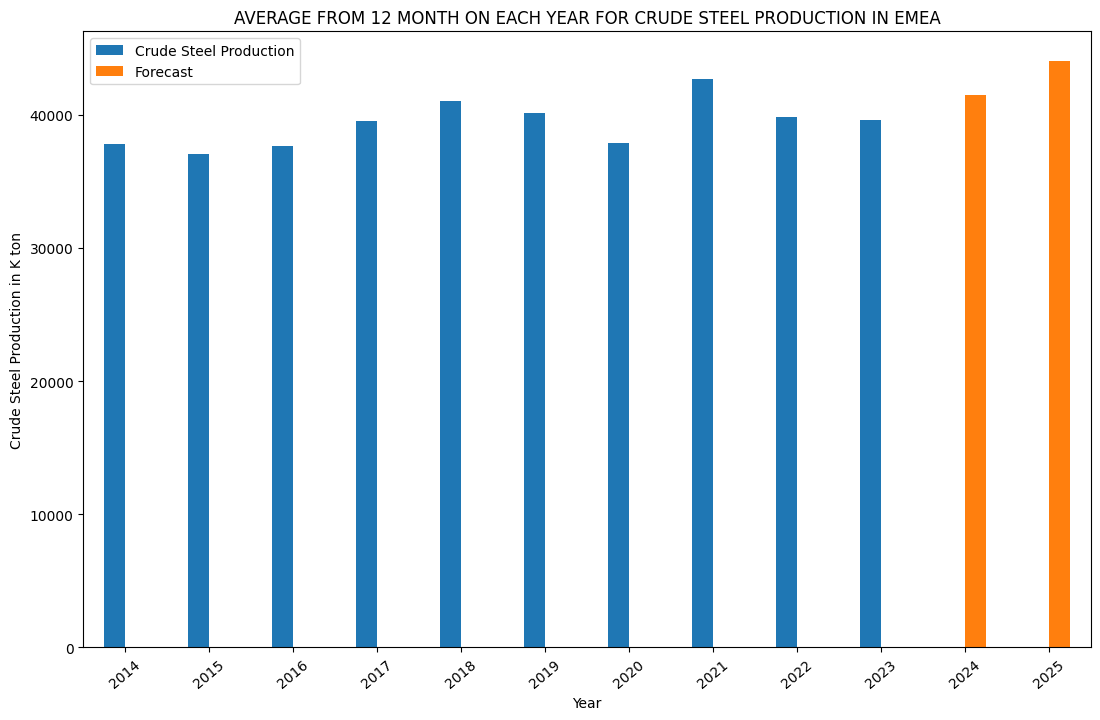

In [200]:
#plot

data_average_v.plot.bar(x = 'year', y = ['value', 'forecast'], rot = 40,figsize=(13, 8))
# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i], rotation = 40)

def addlabels2(c):
    for i in range(len(c)):
        plt.text(i,c[i],c[i])
        
#fig = plt.figure(1, figsize=(50, 40), frameon=False, dpi=90)

# #remove decimal point
# data_average_v = data_average_v.fillna(0)
# data_average_v['value'] = data_average_v['value'].astype(int)
# data_average_v['forecast'] = data_average_v['forecast'].astype(int)

#print with label
# y = data_average_v['value']
# c = data_average_v['forecast']
# addlabels(y)
# addlabels(c)

plt.xlabel("Year")
plt.ylabel("Crude Steel Production in K ton")
plt.title("AVERAGE FROM 12 MONTH ON EACH YEAR FOR CRUDE STEEL PRODUCTION IN EMEA")
plt.legend(['Crude Steel Production','Forecast']) 
plt.show()

# Americas

In [201]:
#read data
df = pd.read_excel("C:/Users/fauziah/Desktop/other/data/2013-2023_ Monthly  Steel Production Data.xlsx", 'Monthly Steel Outlook', header = 1)

#Unpivot the table
df_unpivot2 = pd.melt(df, id_vars=['Year ', 'Resoanc Regions '], value_vars=[ 'crude steel: January',
       'crude steel: February', 'crude steel: March', 'crude steel: April',
       'crude steel: May', 'crude steel: June', 'crude steel: July',
       'crude steel: August', 'crude steel: September', 'crude steel: October',
       'crude steel: November', 'crude steel: December'])
df_unpivot2.rename(columns = {'Year ':'Year'}, inplace = True)
df_unpivot2.Year = df_unpivot2.Year.astype(str)

# selecting rows based on condition 
df_unpivot2 = df_unpivot2[df_unpivot2['Resoanc Regions '] == 'Americas'] 

#Remove character in the value and column that we dont need 
df_unpivot2['date'] =  df_unpivot2.Year.str[0:]+ " " + df_unpivot2.variable.str[13:]
#df_unpivot2.columns = ['Year','t', 'value', 'date']
df_unpivot2 = df_unpivot2[['value', 'date']]

#Group by the date
df = df_unpivot2.groupby('date').sum().reset_index()

#Change date data type
df['date']=pd.to_datetime(df['date'])

#sort the date in ascending
df.sort_values(by='date', ascending = True, inplace = True)

#Set the index for date
df.set_index('date',inplace=True)


C:\Users\fauziah\AppData\Local\Temp\ipykernel_8224\1875623949.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date']=pd.to_datetime(df['date'])


<Axes: xlabel='date'>

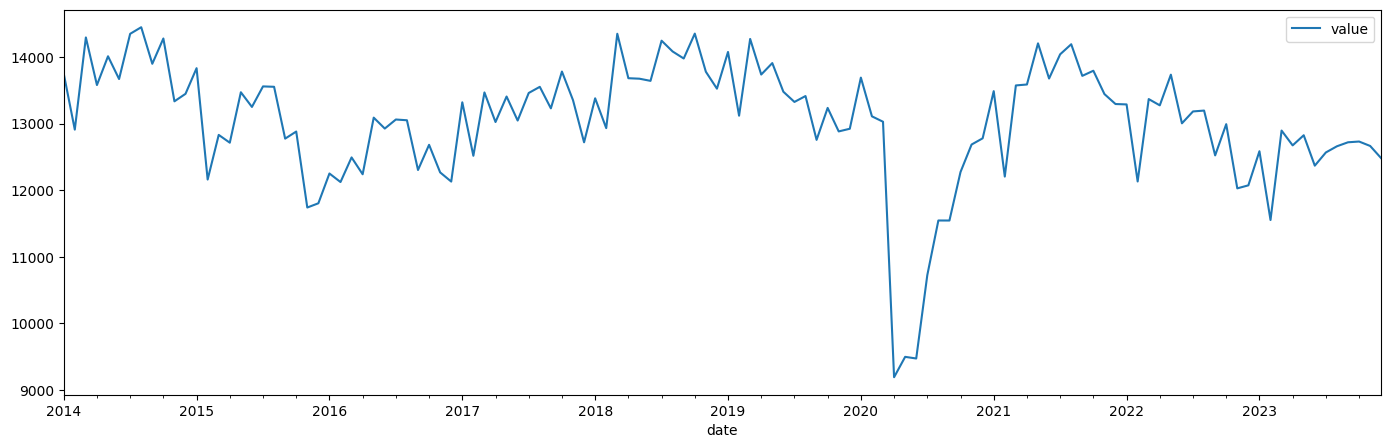

In [121]:
df.plot(figsize=(17,5))

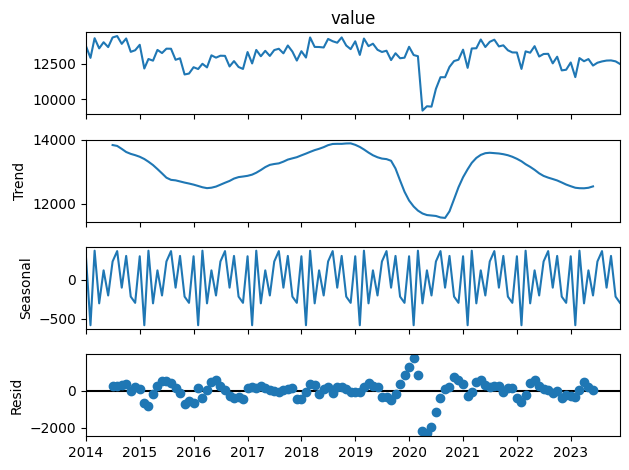

In [126]:
#Decompose Method

from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['value'],model='additive', period=12)
decompose.plot()
plt.show()


<Axes: xlabel='date'>

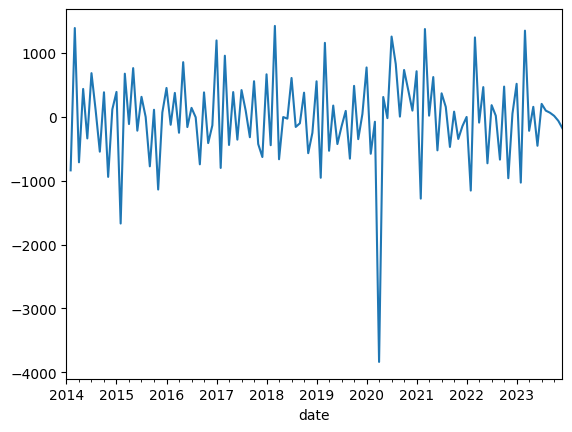

In [127]:
#df['Seasonal First Difference']=df['value']-df['value'].shift(12)
df['Seasonal First Difference'] = df['value'].diff().dropna()

df['Seasonal First Difference'].plot()


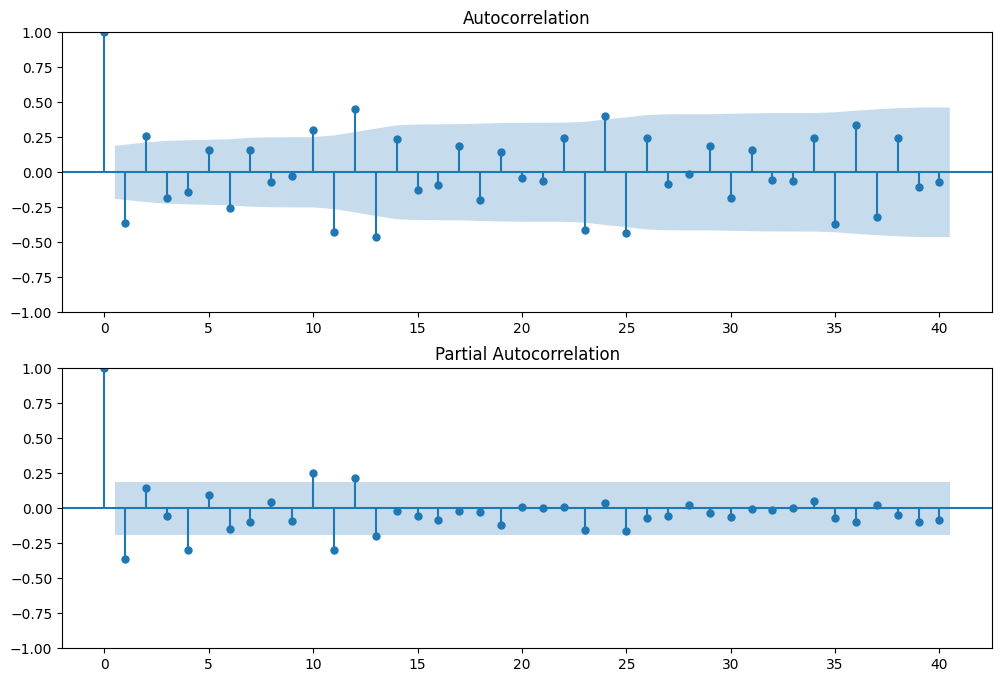

In [128]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

#### Evaluate Model

In [206]:
#MODEL 1

model=sm.tsa.statespace.SARIMAX(df['value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
results.summary()


C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -823.491
Date:                            Tue, 16 Jan 2024   AIC                           1656.982
Time:                                    11:49:15   BIC                           1670.346
Sample:                                01-01-2014   HQIC                          1662.400
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0306      0.432      0.071      0.943      -0.816       0.877
ma.L1          0.1909      0.425      0.450      0.653      -0.641       1.023
ar.S.L12       0.0978      0.055      1.774      0.076      -0.010       0.206
ma.S.L12      -0.9980      0.069    -14.569      0.000      -1.132      -0.864
sigma2      2.018e+05   3.44e-07   5.87e+11      0.000    2.02e+05    2.02e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               642.51
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -1.87
Prob(H) (two-sided):                  0.92   Kurtosis:                        14.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.19e+28. Standard errors may be unstable.
"""

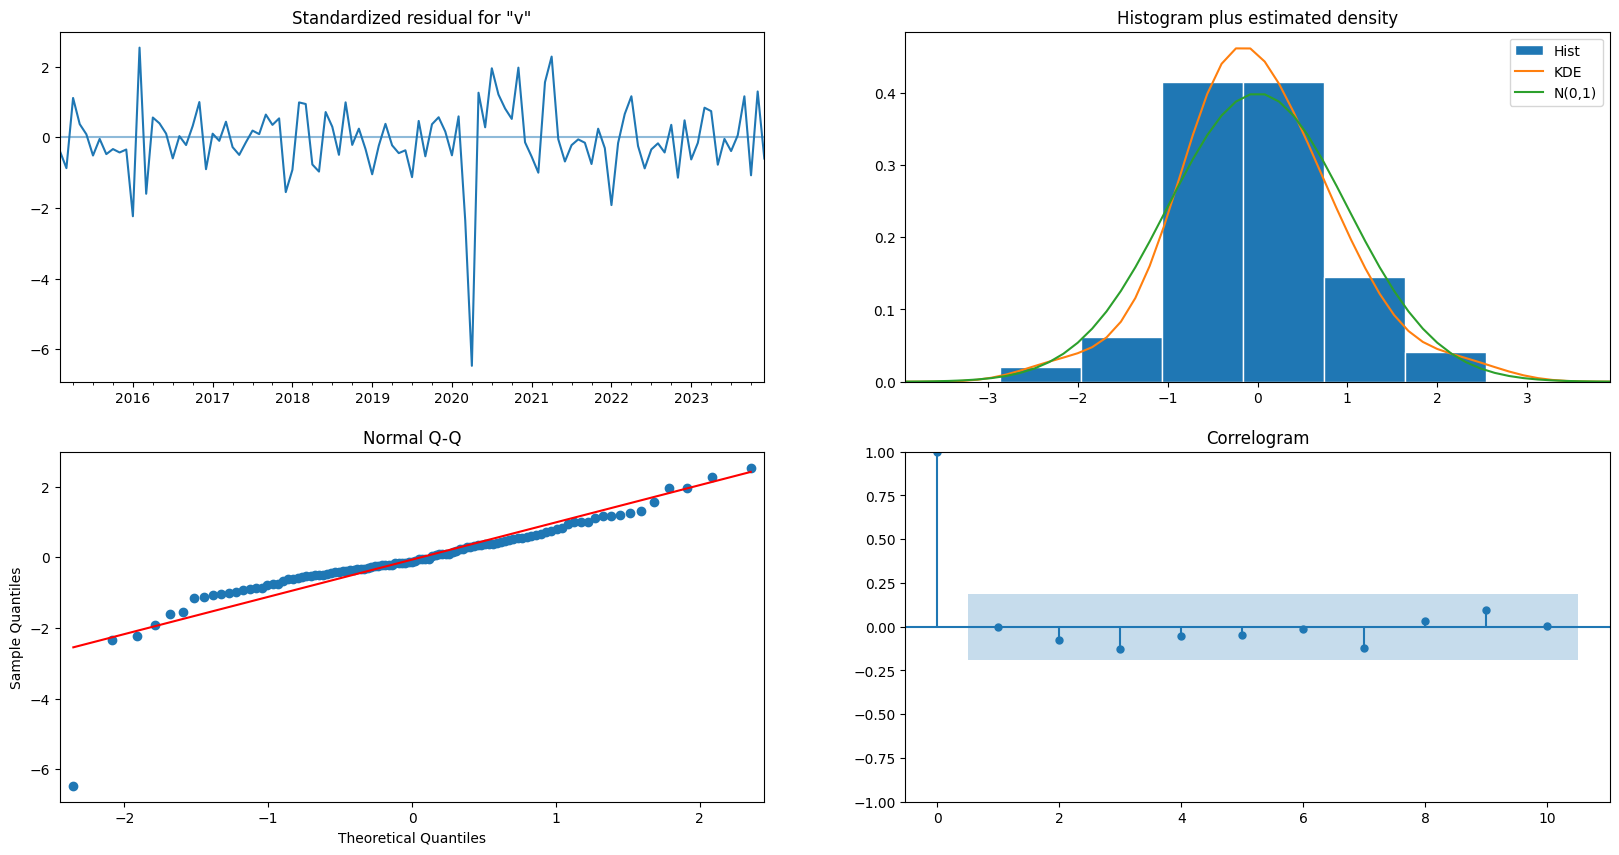

In [207]:
results.plot_diagnostics(figsize=(20, 10))
plt.show()

<Axes: xlabel='date'>

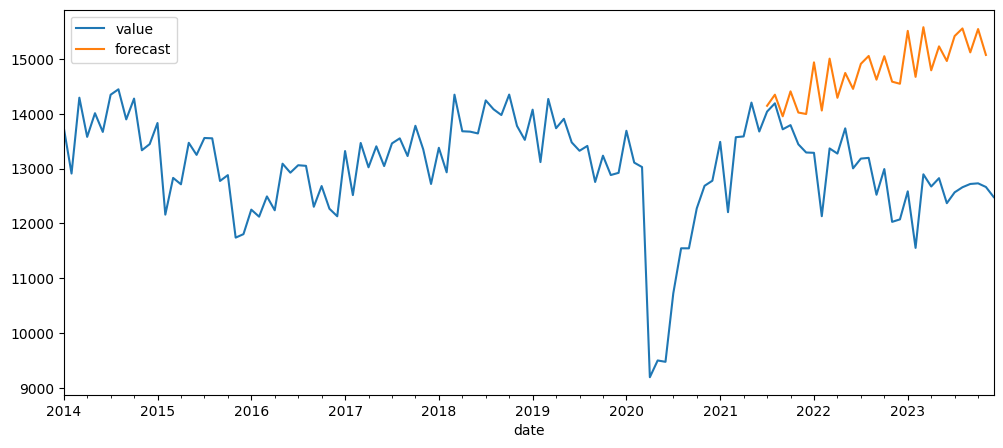

In [205]:
df['forecast']=results.predict(start=90,end=118,dynamic=True)
df[['value','forecast']].plot(figsize=(12,5))

In [208]:
# MODEL 2

model2=sm.tsa.statespace.SARIMAX(df['value'],order=(1, 0, 1),seasonal_order=(1,1,1,12))
results2=model2.fit()
results2.summary()


C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  120
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -861.782
Date:                            Tue, 16 Jan 2024   AIC                           1733.564
Time:                                    11:49:27   BIC                           1746.975
Sample:                                01-01-2014   HQIC                          1739.002
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5639      0.035     16.258      0.000       0.496       0.632
ma.L1          0.3394      0.080      4.224      0.000       0.182       0.497
ar.S.L12       0.0189      0.156      0.121      0.903      -0.286       0.324
ma.S.L12      -0.3207      0.162     -1.984      0.047      -0.637      -0.004
sigma2      3.628e+05   2.68e+04     13.528      0.000     3.1e+05    4.15e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.37   Jarque-Bera (JB):               278.14
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                            -1.14
Prob(H) (two-sided):                  0.31   Kurtosis:                        10.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

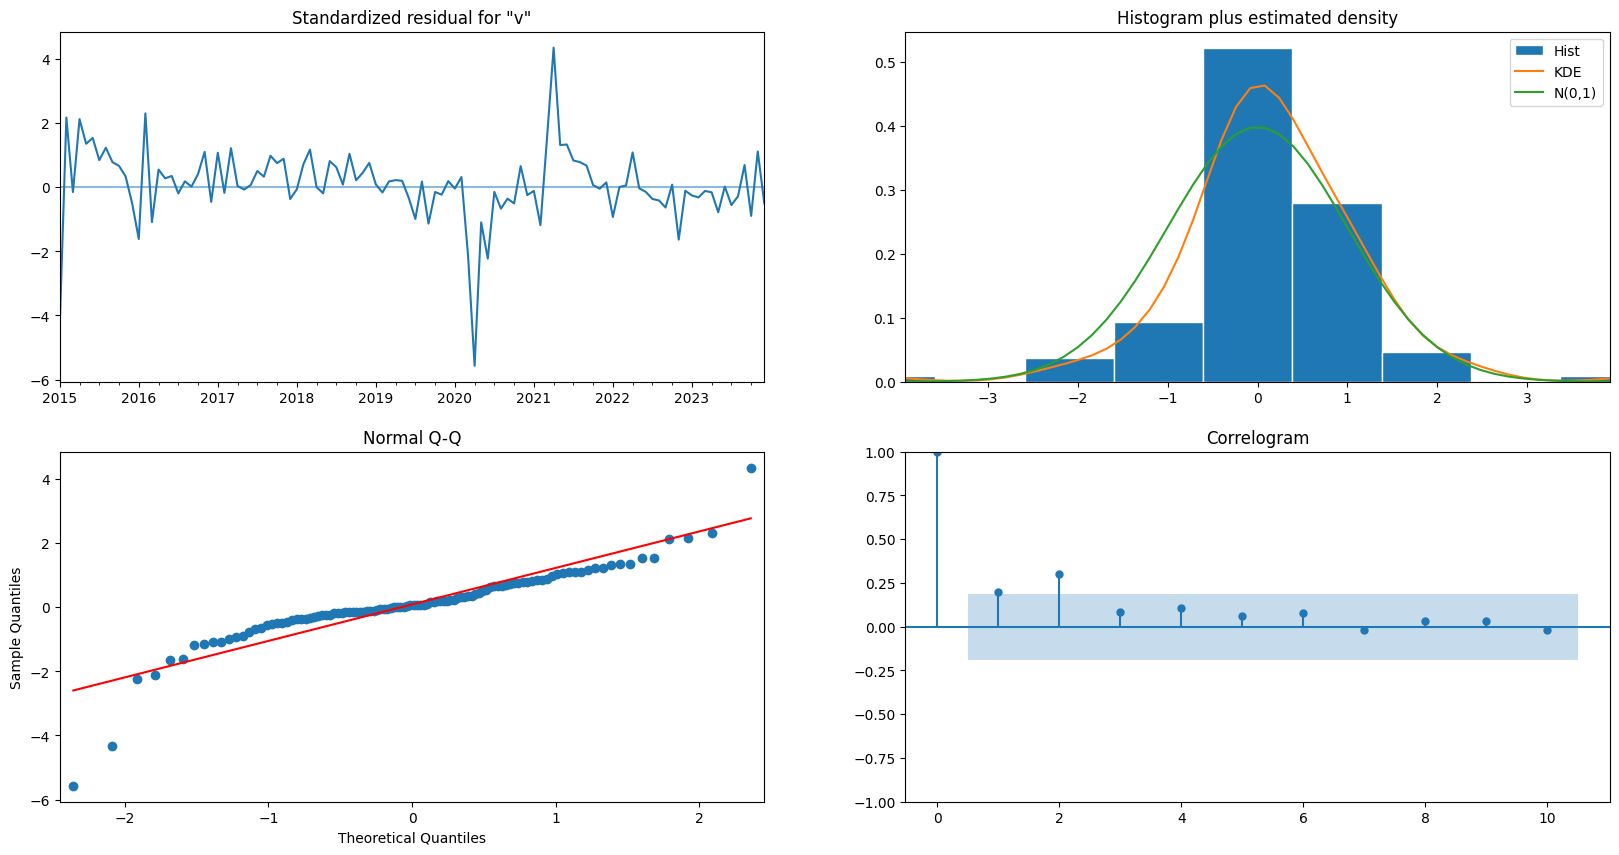

In [209]:
results2.plot_diagnostics(figsize=(20, 10))
plt.show()

<Axes: xlabel='date'>

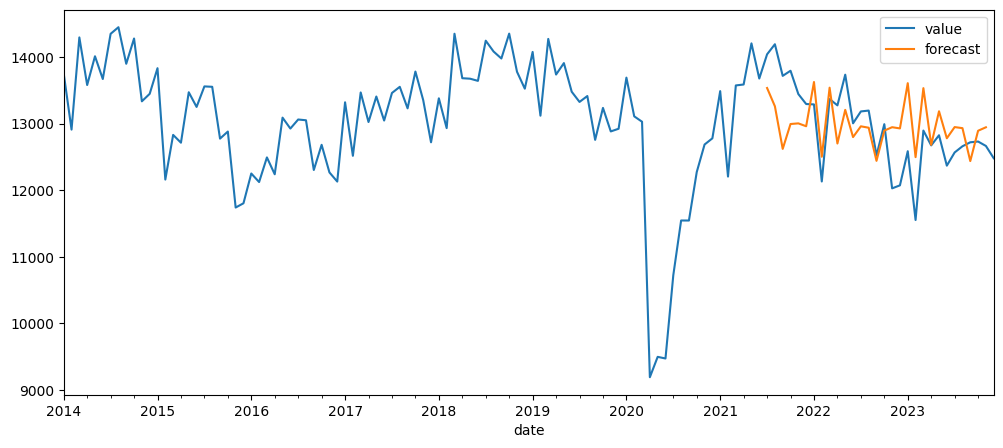

In [210]:
df['forecast']=results2.predict(start=90,end=118,dynamic=True)
df[['value','forecast']].plot(figsize=(12,5))


#### Final model for Prediction

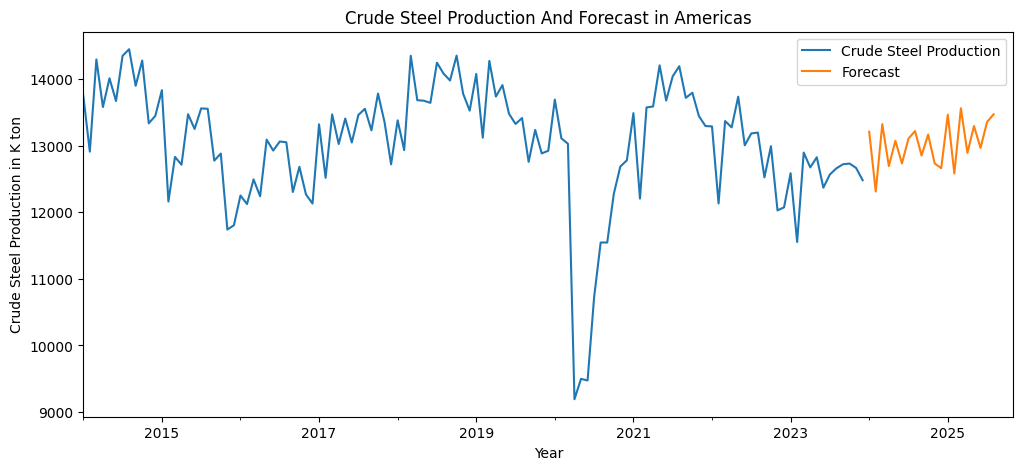

In [214]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 120, end = 139, dynamic= True)  
future_df

future_df[['value','forecast']].plot(figsize=(12,5))

plt.xlabel("Year")
plt.ylabel("Crude Steel Production in K ton")
plt.title("Crude Steel Production And Forecast in Americas")

plt.legend(['Crude Steel Production','Forecast']) 



In [212]:
#average by year, value and forecast

agg_data = future_df.reset_index()

agg_data['year'] = agg_data['index'].dt.year

data_average = agg_data.groupby(agg_data.year)['forecast'].mean()
data_average = pd.DataFrame(data_average)

data_average_v = agg_data.groupby(agg_data.year)['value'].mean()
data_average_v = pd.DataFrame(data_average_v)

data_average_v['forecast'] =  data_average['forecast']

data_average_v = data_average_v.reset_index()

data_average_v

year         value      forecast
0   2014  13830.023925           NaN
1   2015  12880.190420           NaN
2   2016  12550.830000           NaN
3   2017  13239.097583           NaN
4   2018  13800.916750           NaN
5   2019  13426.659472           NaN
6   2020  11628.392083           NaN
7   2021  13600.675500           NaN
8   2022  12899.110417           NaN
9   2023  12559.802312           NaN
10  2024           NaN  12922.284182
11  2025           NaN  13197.147942

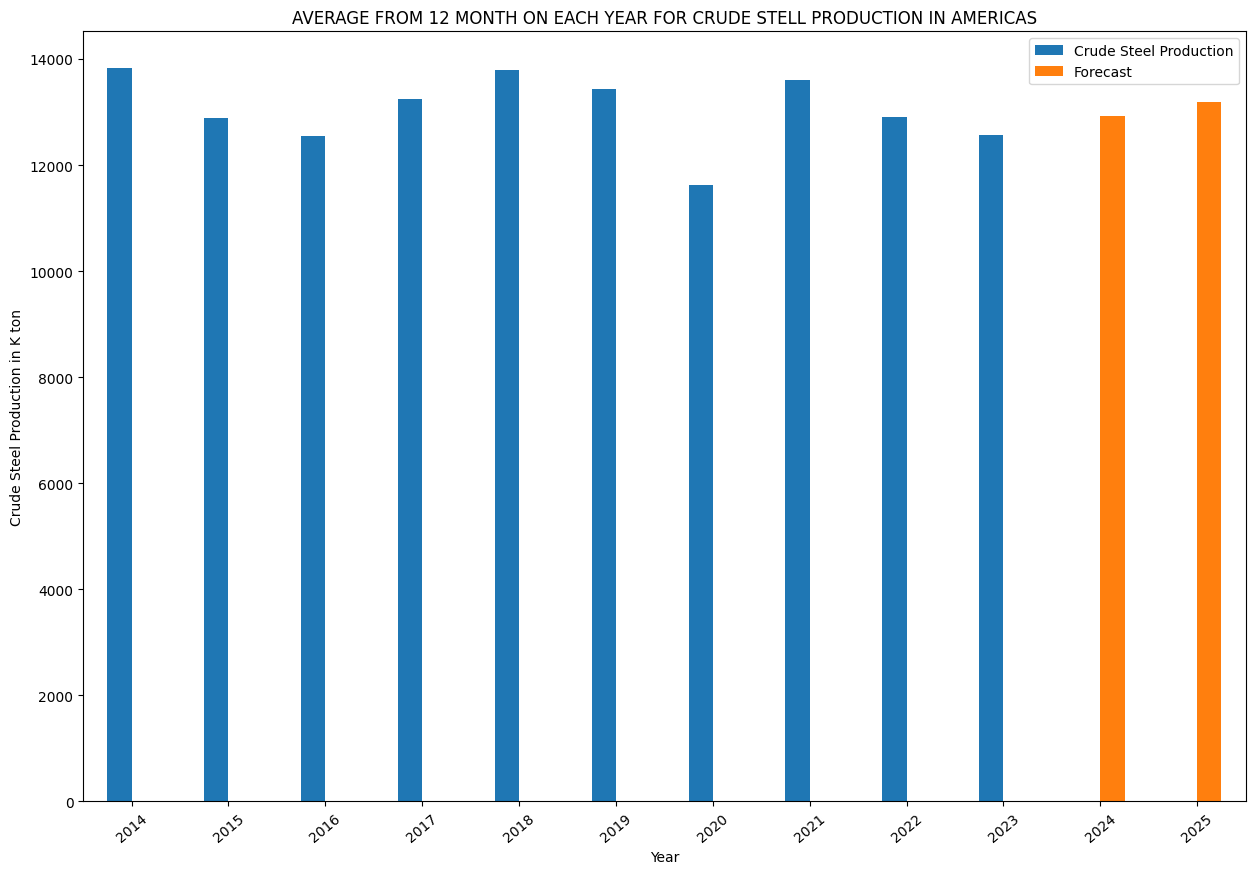

In [217]:
#plot

data_average_v.plot.bar(x = 'year', y = ['value', 'forecast'], rot = 40,figsize=(15, 10))
# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i], rotation = 40)

def addlabels2(c):
    for i in range(len(c)):
        plt.text(i,c[i],c[i])
        
#fig = plt.figure(1, figsize=(50, 40), frameon=False, dpi=90)

# #remove decimal point
# data_average_v = data_average_v.fillna(0)
# data_average_v['value'] = data_average_v['value'].astype(int)
# data_average_v['forecast'] = data_average_v['forecast'].astype(int)

#print with label
# y = data_average_v['value']
# c = data_average_v['forecast']
# addlabels(y)
# addlabels(c)
plt.xlabel("Year")
plt.ylabel("Crude Steel Production in K ton")
plt.title("AVERAGE FROM 12 MONTH ON EACH YEAR FOR CRUDE STELL PRODUCTION IN AMERICAS")
plt.legend(['Crude Steel Production','Forecast']) 
plt.show()

## CHINA

In [218]:
#read data
df = pd.read_excel("C:/Users/fauziah/Desktop/other/data/2013-2023_ Monthly  Steel Production Data.xlsx", 'Monthly Steel Outlook', header = 1)

#Unpivot the table
df_unpivot2 = pd.melt(df, id_vars=['Year ', 'Resoanc Regions '], value_vars=[ 'crude steel: January',
       'crude steel: February', 'crude steel: March', 'crude steel: April',
       'crude steel: May', 'crude steel: June', 'crude steel: July',
       'crude steel: August', 'crude steel: September', 'crude steel: October',
       'crude steel: November', 'crude steel: December'])
df_unpivot2.rename(columns = {'Year ':'Year'}, inplace = True)
df_unpivot2.Year = df_unpivot2.Year.astype(str)

# selecting rows based on condition 
df_unpivot2 = df_unpivot2[df_unpivot2['Resoanc Regions '] == 'China'] 

#Remove character in the value and column that we dont need 
df_unpivot2['date'] =  df_unpivot2.Year.str[0:]+ " " + df_unpivot2.variable.str[13:]
#df_unpivot2.columns = ['Year','t', 'value', 'date']
df_unpivot2 = df_unpivot2[['value', 'date']]

#Group by the date
df = df_unpivot2.groupby('date').sum().reset_index()

#Change date data type
df['date']=pd.to_datetime(df['date'])

#sort the date in ascending
df.sort_values(by='date', ascending = True, inplace = True)

#Set the index for date
df.set_index('date',inplace=True)

C:\Users\fauziah\AppData\Local\Temp\ipykernel_8224\3042326646.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date']=pd.to_datetime(df['date'])


<Axes: xlabel='date'>

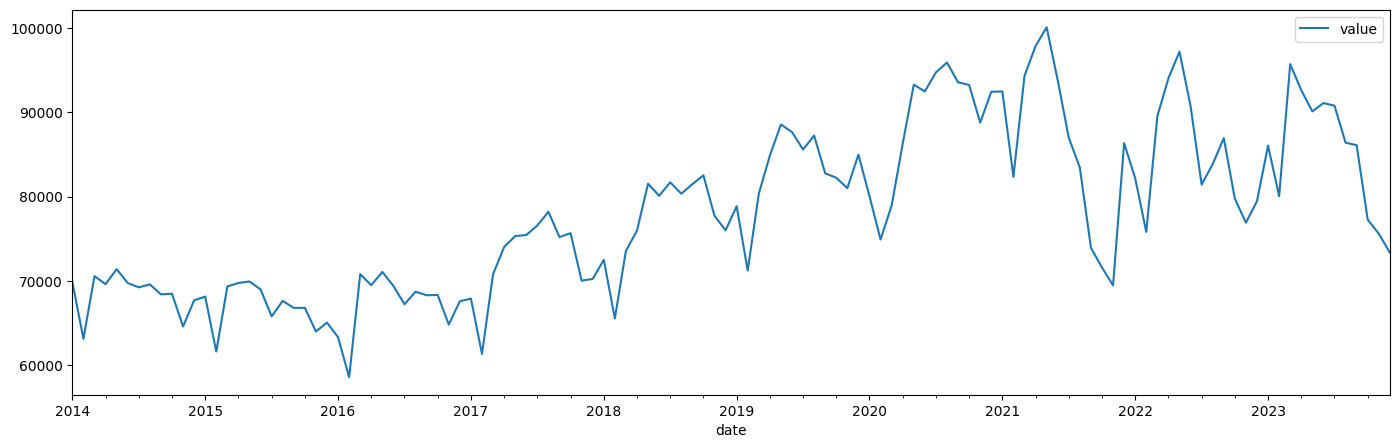

In [137]:
df.plot(figsize=(17,5))

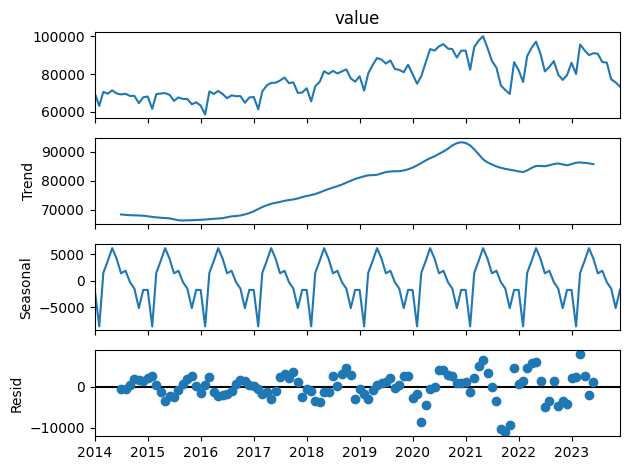

In [149]:
#Decompose Method

from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['value'],model='additive', period=12)
decompose.plot()
plt.show()


<Axes: xlabel='date'>

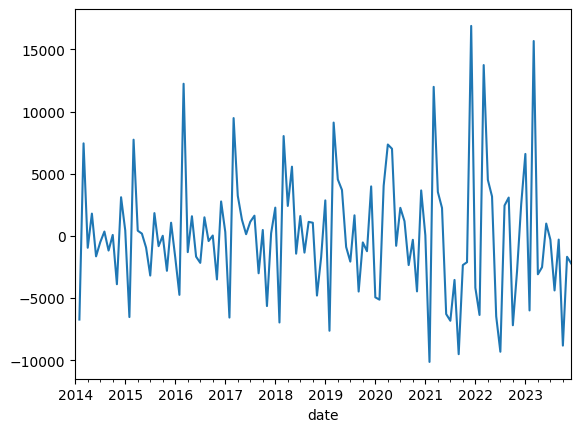

In [150]:
#df['Seasonal First Difference']=df['value']-df['value'].shift(12)
df['Seasonal First Difference'] = df['value'].diff().dropna()

df['Seasonal First Difference'].plot()


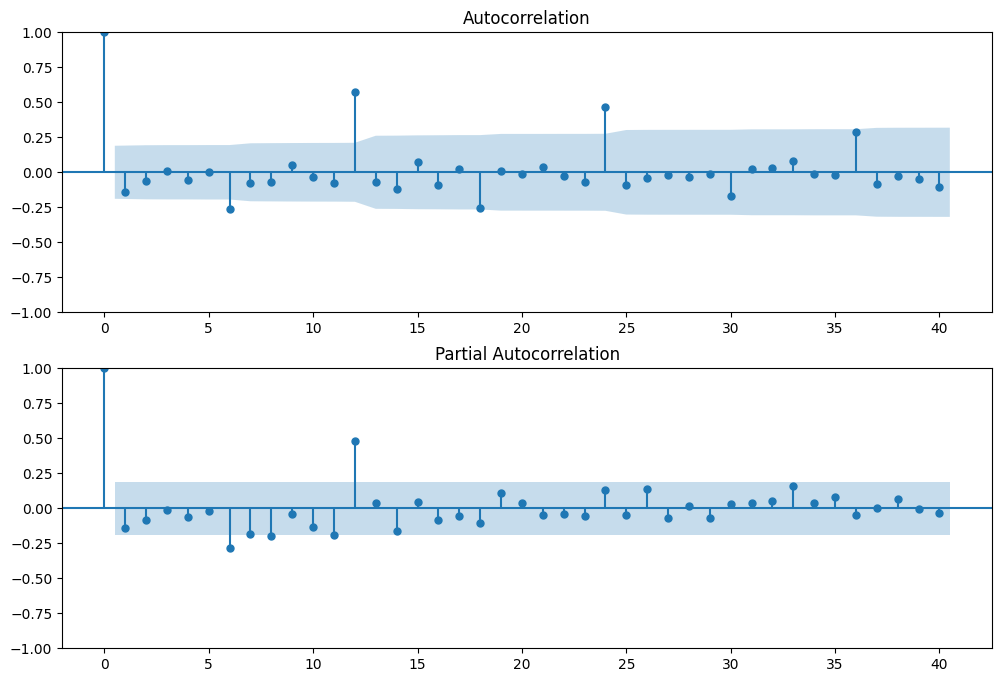

In [151]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)


#### Evaluate Model

In [219]:
#MODEL 1
model=sm.tsa.statespace.SARIMAX(df['value'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
results.summary()


C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1036.333
Date:                            Tue, 16 Jan 2024   AIC                           2082.665
Time:                                    11:51:38   BIC                           2096.029
Sample:                                01-01-2014   HQIC                          2088.083
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9469      0.095     10.010      0.000       0.762       1.132
ma.L1         -0.9873      0.114     -8.692      0.000      -1.210      -0.765
ar.S.L12       0.6595      0.124      5.333      0.000       0.417       0.902
ma.S.L12      -0.9329      0.177     -5.274      0.000      -1.279      -0.586
sigma2      1.426e+07   1.86e-08   7.68e+14      0.000    1.43e+07    1.43e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.10   Jarque-Bera (JB):                 9.85
Prob(Q):                              0.29   Prob(JB):                         0.01
Heteroskedasticity (H):               7.83   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.39e+30. Standard errors may be unstable.
"""

<Axes: xlabel='date'>

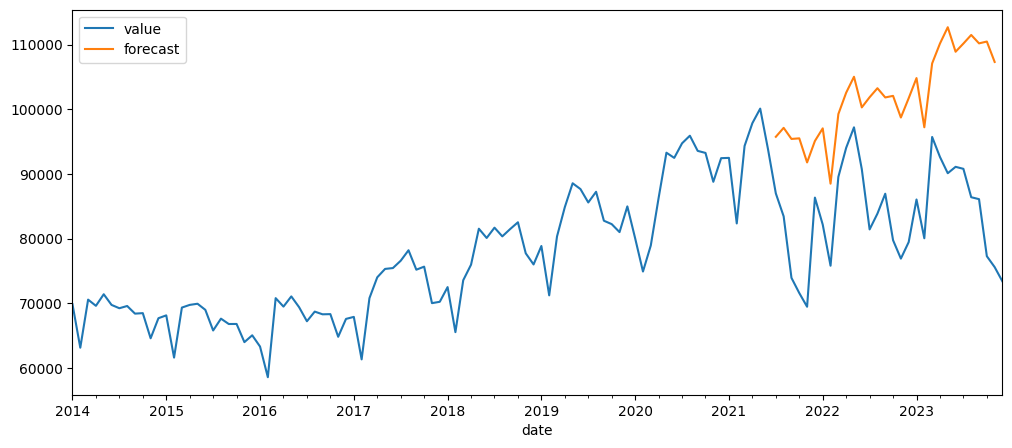

In [220]:
df['forecast']=results.predict(start=90,end=118,dynamic=True)
df[['value','forecast']].plot(figsize=(12,5))

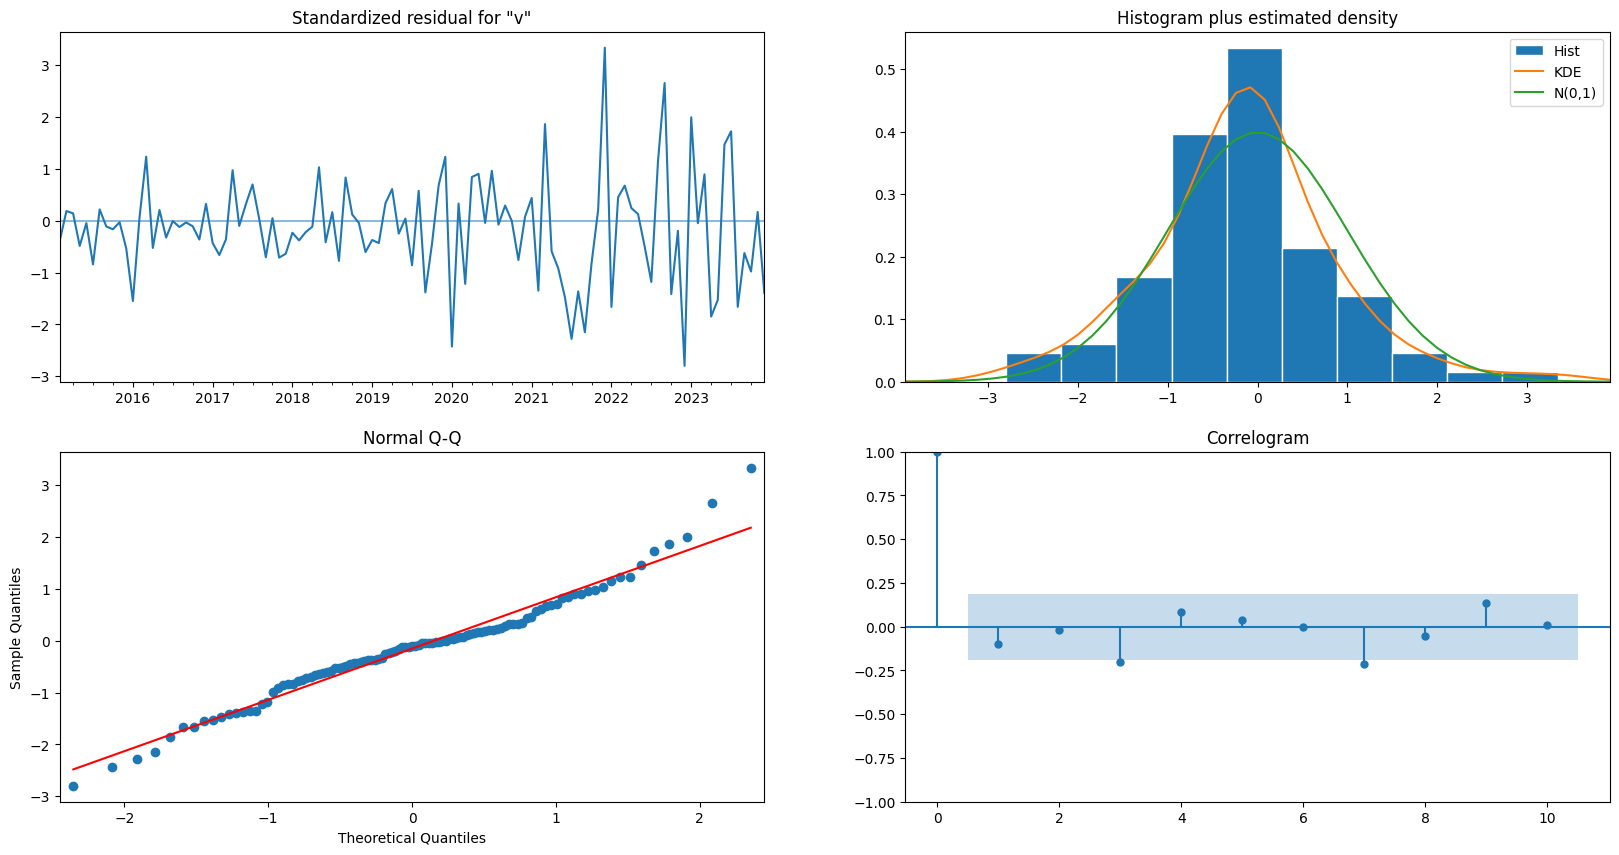

In [221]:
results.plot_diagnostics(figsize=(20, 10))
plt.show()

In [222]:
# MODEL 2

model2=sm.tsa.statespace.SARIMAX(df['value'],order=(1, 0, 1),seasonal_order=(1,1,1,12))
results2=model2.fit()
results2.summary()


C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\fauziah\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                  120
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -1086.454
Date:                            Tue, 16 Jan 2024   AIC                           2182.908
Time:                                    11:51:48   BIC                           2196.319
Sample:                                01-01-2014   HQIC                          2188.345
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4853      0.078      6.258      0.000       0.333       0.637
ma.L1         -0.0100      0.124     -0.081      0.936      -0.252       0.232
ar.S.L12      -0.1767      0.245     -0.721      0.471      -0.657       0.303
ma.S.L12       0.0386      0.261      0.148      0.883      -0.474       0.551
sigma2      1.621e+07   1.97e-08   8.24e+14      0.000    1.62e+07    1.62e+07
===================================================================================
Ljung-Box (L1) (Q):                   9.11   Jarque-Bera (JB):               234.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -1.84
Prob(H) (two-sided):                  0.53   Kurtosis:                         9.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.1e+30. Standard errors may be unstable.
"""

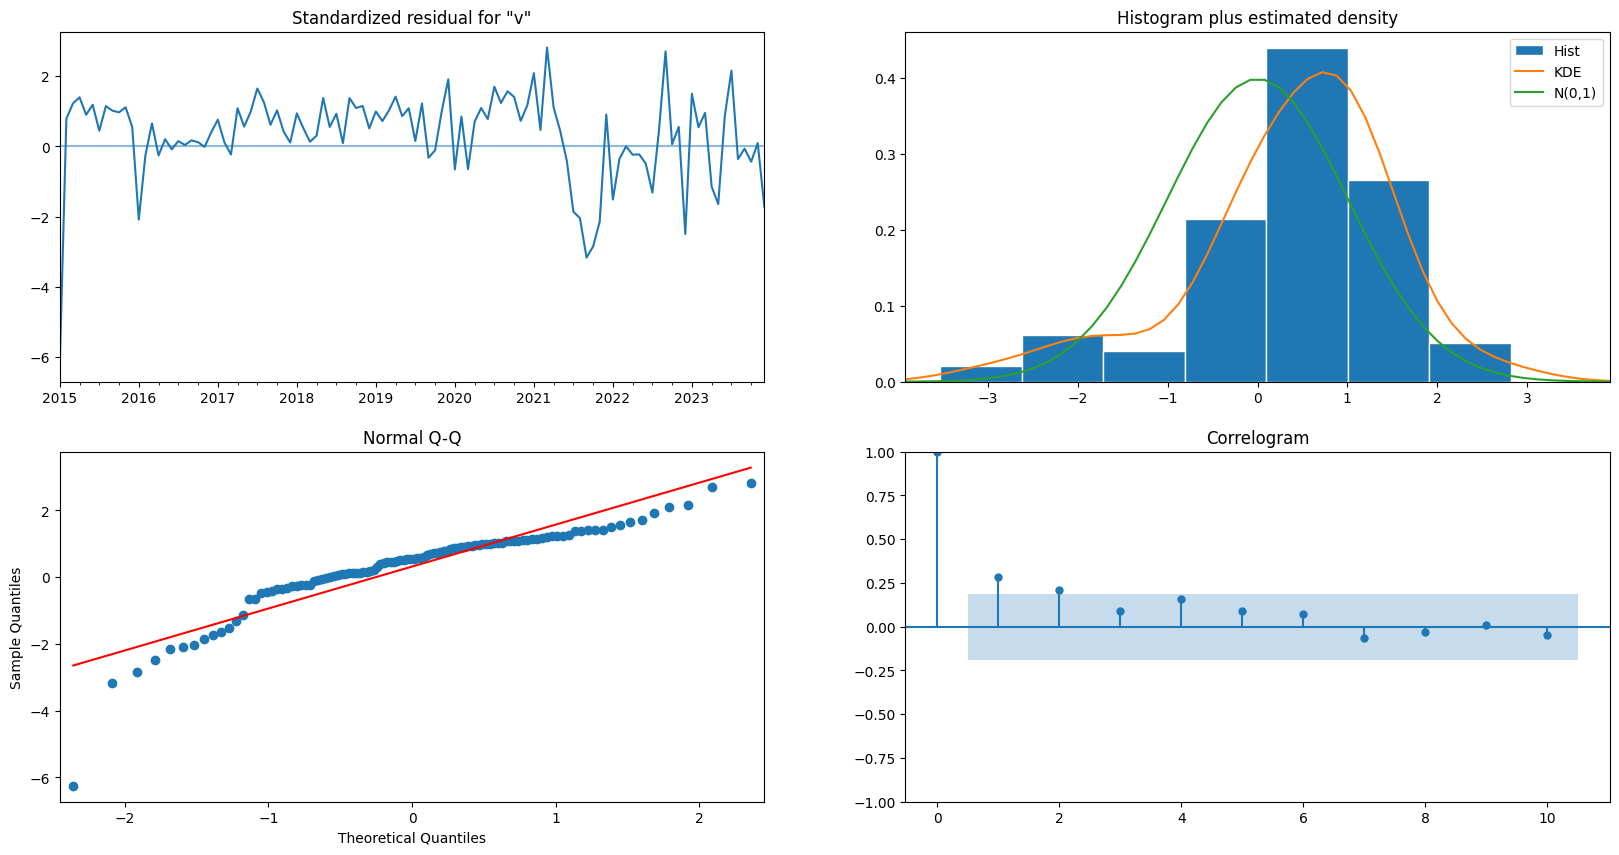

In [223]:
results2.plot_diagnostics(figsize=(20, 10))
plt.show()


<Axes: xlabel='date'>

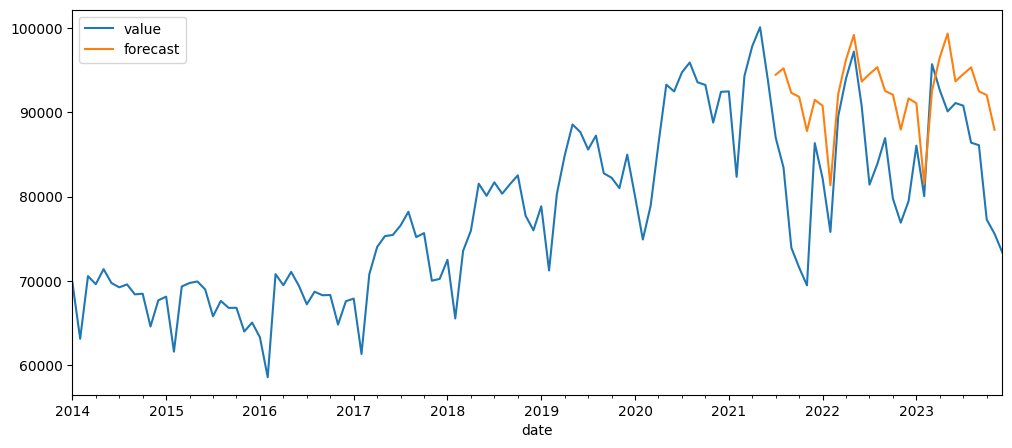

In [224]:
df['forecast']=results2.predict(start=90,end=118,dynamic=True)
df[['value','forecast']].plot(figsize=(12,5))

#### Final model for Prediction

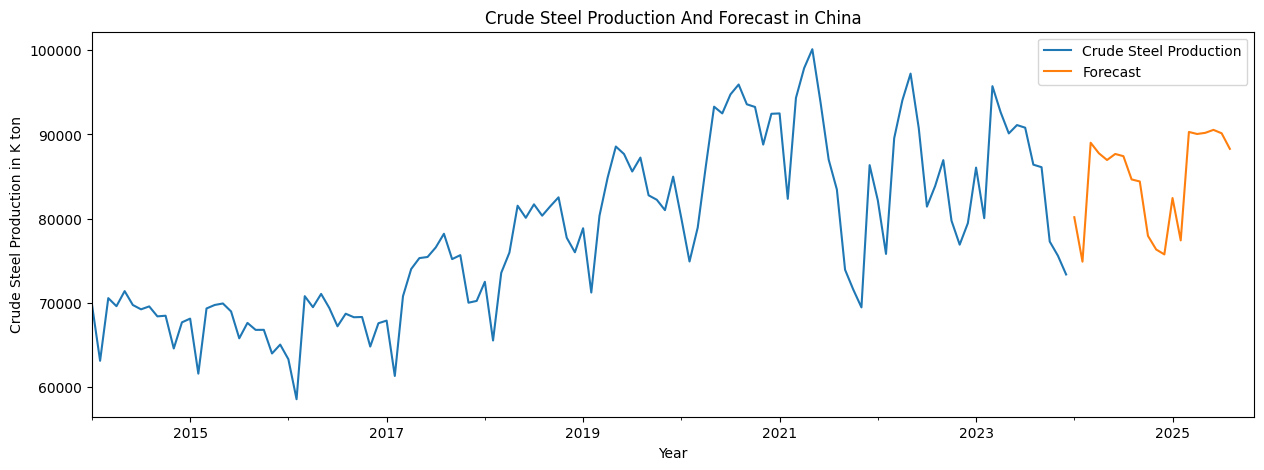

In [228]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 120, end = 139, dynamic= True)  
future_df

future_df[['value','forecast']].plot(figsize=(15,5))


plt.xlabel("Year")
plt.ylabel("Crude Steel Production in K ton")
plt.title("Crude Steel Production And Forecast in China")

plt.legend(['Crude Steel Production','Forecast']) 

In [229]:
#average by year, value and forecast

agg_data = future_df.reset_index()

agg_data['year'] = agg_data['index'].dt.year

data_average = agg_data.groupby(agg_data.year)['forecast'].mean()
data_average = pd.DataFrame(data_average)

data_average_v = agg_data.groupby(agg_data.year)['value'].mean()
data_average_v = pd.DataFrame(data_average_v)

data_average_v['forecast'] =  data_average['forecast']

data_average_v = data_average_v.reset_index()

data_average_v

year         value      forecast
0   2014  68525.508333           NaN
1   2015  66985.416667           NaN
2   2016  67300.750000           NaN
3   2017  72561.750000           NaN
4   2018  77419.833333           NaN
5   2019  82951.583333           NaN
6   2020  88727.650000           NaN
7   2021  86065.816667           NaN
8   2022  84829.916667           NaN
9   2023  85441.717708           NaN
10  2024           NaN  82753.452672
11  2025           NaN  87420.651182

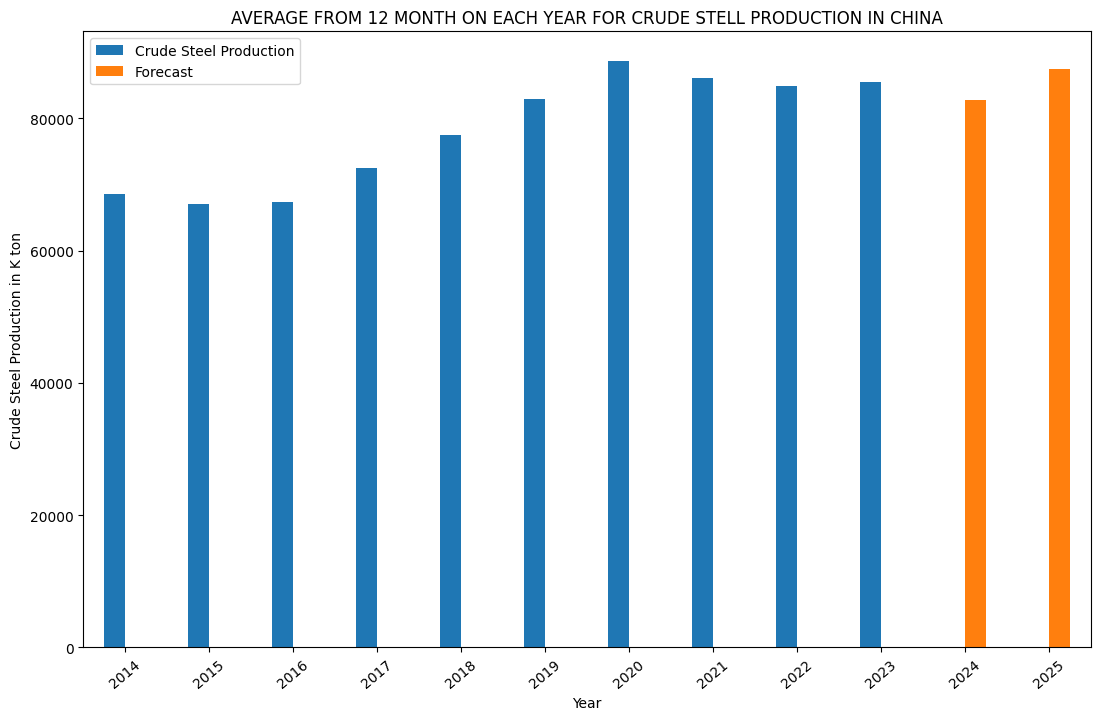

In [230]:

#plot

data_average_v.plot.bar(x = 'year', y = ['value', 'forecast'], rot = 40,figsize=(13, 8))
# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i], rotation = 40)

def addlabels2(c):
    for i in range(len(c)):
        plt.text(i,c[i],c[i])
        
#fig = plt.figure(1, figsize=(50, 40), frameon=False, dpi=90)

# #remove decimal point
# data_average_v = data_average_v.fillna(0)
# data_average_v['value'] = data_average_v['value'].astype(int)
# data_average_v['forecast'] = data_average_v['forecast'].astype(int)

#print with label
# y = data_average_v['value']
# c = data_average_v['forecast']
# addlabels(y)
# addlabels(c)


plt.xlabel("Year")
plt.ylabel("Crude Steel Production in K ton")
plt.title("AVERAGE FROM 12 MONTH ON EACH YEAR FOR CRUDE STELL PRODUCTION IN CHINA")
plt.legend(['Crude Steel Production','Forecast']) 
plt.show()

# Overall Conclusion